In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-30 08:35:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-06-30 08:35:23 (79.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-30 08:35:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-30 08:35:27 (75.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow_hub as tfhub
import tensorflow_datasets as tfds
from helper_functions import *
from sklearn.preprocessing import *
import csv
from datetime import *

In [ ]:
bitcoin_data = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                            parse_dates = ['Date'],
                            index_col = ['Date'])

In [ ]:
bitcoin_data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
bitcoin_data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(bitcoin_data)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(bitcoin_data['Closing Price (USD)']).rename(columns = {'Closing Price (USD)' : 'Price'})

In [ ]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


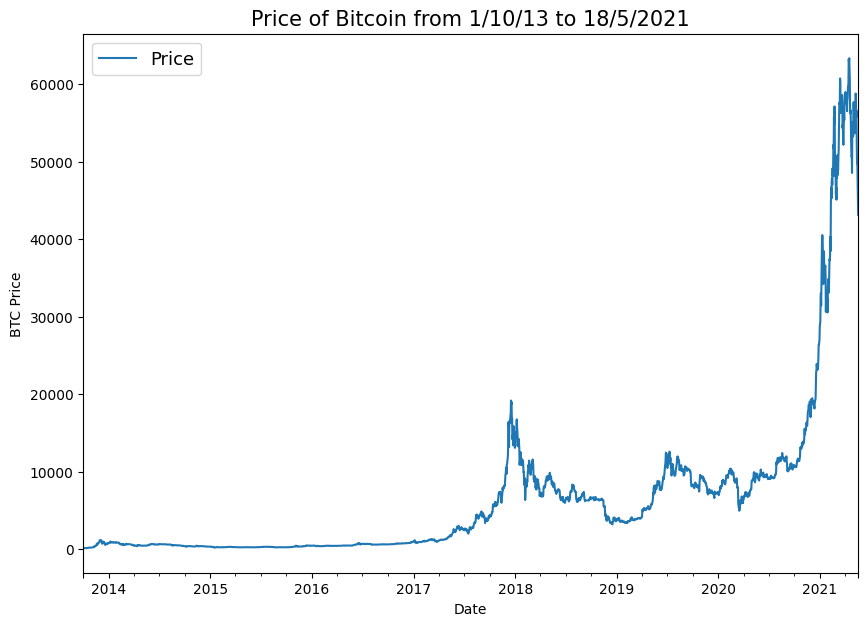

In [ ]:
bitcoin_prices.plot(figsize = (10,7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1/10/13 to 18/5/2021', fontsize = 15)
plt.legend(fontsize = 13)

In [ ]:
timesteps = []
btc_prices = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter = ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_prices.append(float(line[2]))

timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

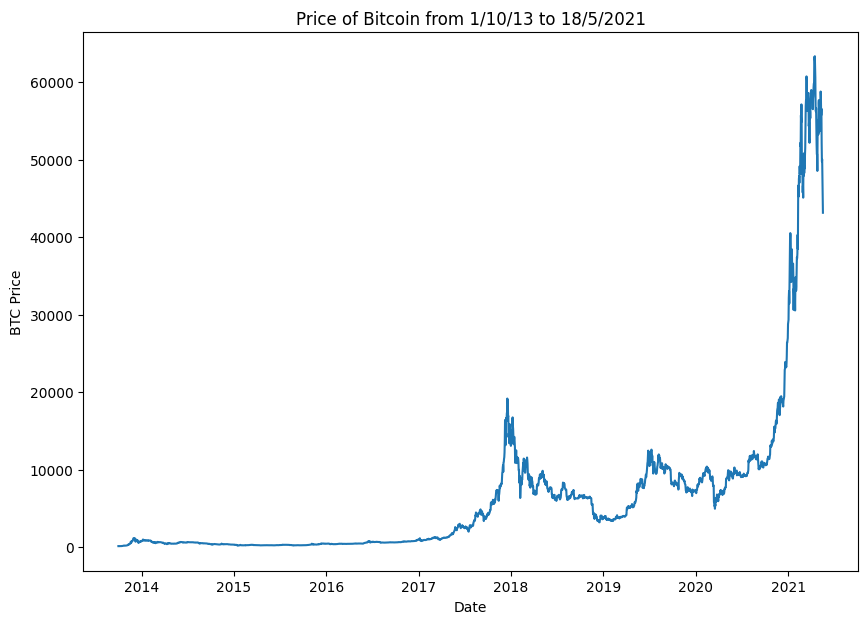

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(timesteps, btc_prices)
plt.title('Price of Bitcoin from 1/10/13 to 18/5/2021')
plt.ylabel('BTC Price')
plt.xlabel('Date')

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
btc_prices = bitcoin_prices['Price'].to_numpy()
split_size = int(0.8 * len(bitcoin_prices))
X_train, y_train = timesteps[:split_size], btc_prices[:split_size]
X_test, y_test = timesteps[split_size:], btc_prices[split_size:]

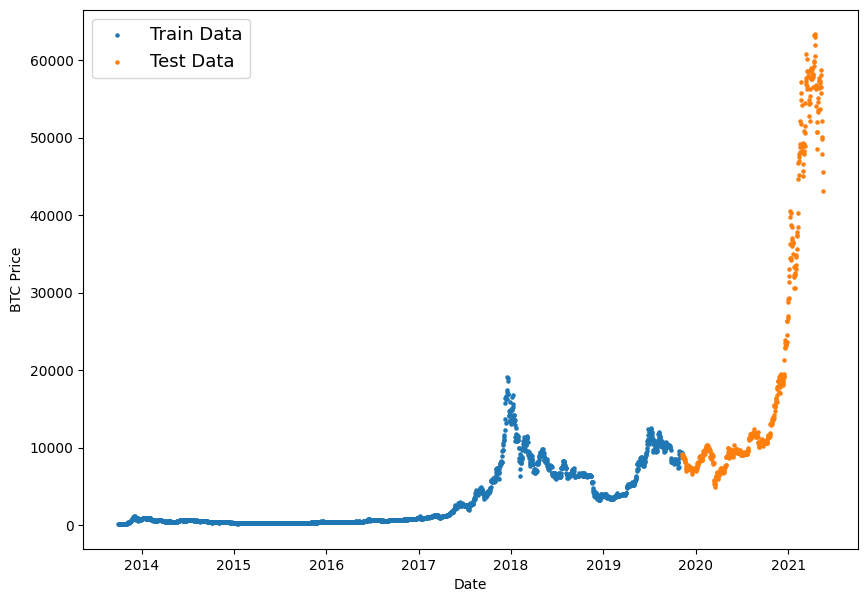

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, y_train, s = 5, label = 'Train Data')
plt.scatter(X_test, y_test, s = 5, label = 'Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize = 13)
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format = '.', start = 0, end = None, legend_label = None, xlabel = '', ylabel = ''):
  """
  Plots timesteps (a series of points in time) against values (a series of values accross timesteps)

  Args:

    timesteps : array of timestep values
    values :  array of values accross time
    format : style of plot, default '.'
    start : from which timestep to start
    end : which timestep to end
    legend_label : label to show on plot about values
    xlabel : x label of the plot, default ''
    ylabel : y label of the plot, default ''
  """
  plt.plot(timesteps[start:end], values[start:end], format, label = legend_label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  if legend_label:
    plt.legend(fontsize = 13)
  plt.grid(True)

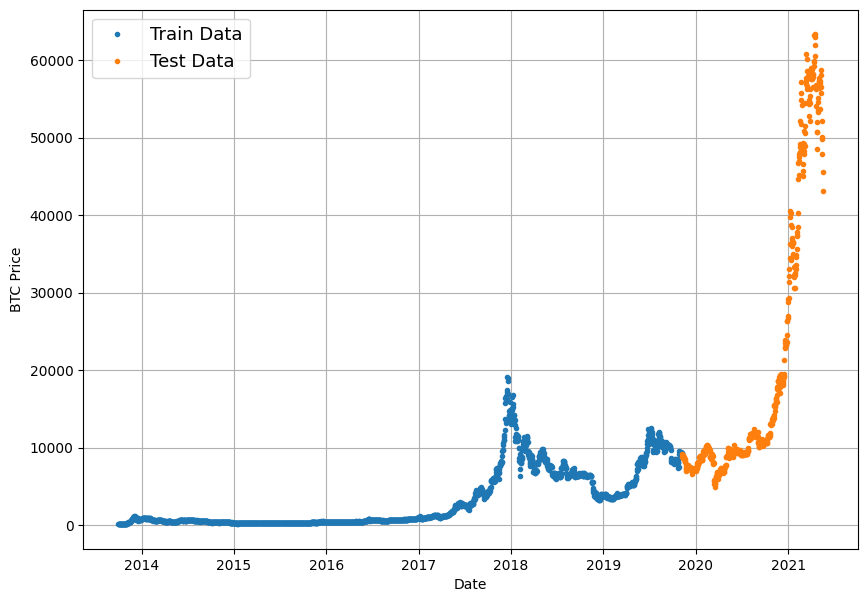

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_train, values = y_train, legend_label = 'Train Data', xlabel = 'Date', ylabel = 'BTC Price')
plot_time_series(timesteps = X_test, values = y_test, legend_label = 'Test Data', xlabel = 'Date', ylabel = 'BTC Price')

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], y_test[:10], naive_forecast[-10:], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

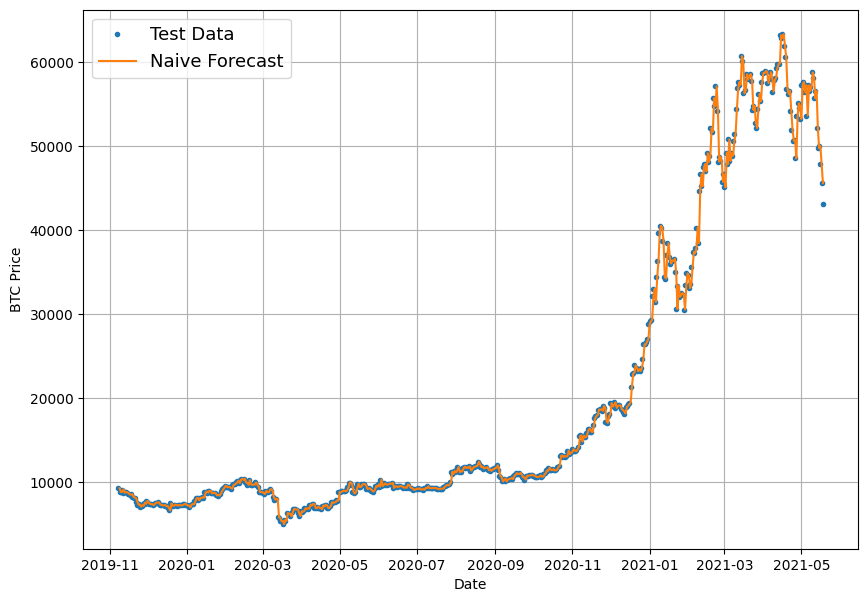

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test, values = y_test, legend_label = 'Test Data', xlabel = 'Date', ylabel = 'BTC Price')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = '-', legend_label = 'Naive Forecast', xlabel = 'Date', ylabel = 'BTC Price')

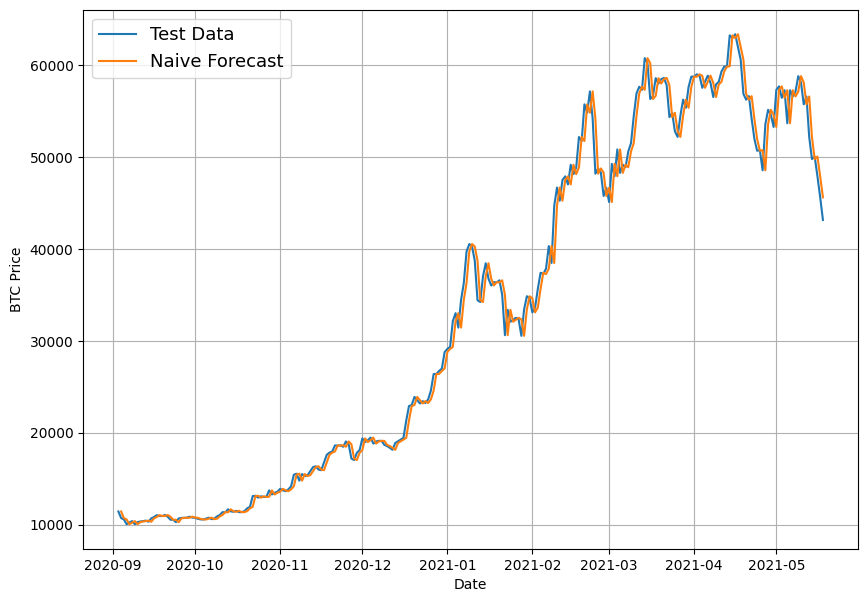

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test, values = y_test, format = '-', start = 300, legend_label = 'Test Data', xlabel = 'Date', ylabel = 'BTC Price')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format = '-', start = 300, legend_label = 'Naive Forecast', xlabel = 'Date', ylabel = 'BTC Price')

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement Mean Absolute Scaled Error (assuming no seasonality of data)

  Args:

    y_true : true value
    y_pred : predicted value
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive

In [ ]:
def calculate_forecast_results(y_true, y_pred):
  """
  Return all forecast errors including MAE, MSE, RMSE, MAPE, MASE
  Args:

    y_true : true value
    y_pred : predicted value
  """
  y_true = tf.cast(y_true, dtype = tf.float32)
  y_pred = tf.cast(y_pred, dtype = tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {
      'mae' : mae.numpy(),
      'mse' : mse.numpy(),
      'rmse' : rmse.numpy(),
      'mape' : mape.numpy(),
      'mase' : mase.numpy(),
  }

In [ ]:
naive_results = calculate_forecast_results(y_true = y_test[1:],
                                  y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
HORIZON = 1
WINDOW = 7
BATCH_SIZE = 128
LOG_DIR = 'model_logs'
OFFSET = 300

In [ ]:
def get_window_horizon(x, horizon = HORIZON):
  """
  Creates labels for windowed dataset

  Args:

    x : sample data
    horizon :  how many values to predict, default is 1
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_window_horizon(tf.expand_dims(tf.range(8), axis = 0))
print(f' Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

 Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
def make_windows(x, window = WINDOW, horizon = HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizxon size labels
  """
  window_step = np.expand_dims(np.arange(window + horizon), axis = 0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window + horizon - 1)), axis = 0).T
  windowed_array = x[window_indexes]
  windows, horizons = get_window_horizon(windowed_array, horizon)

  return windows, horizons

In [ ]:
windows, horizons = make_windows(btc_prices, WINDOW, HORIZON)
len(windows), len(horizons)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f'Window: {windows[i]} -> Label: {horizons[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
def make_train_test_split(windows, horizons, test_split = 0.2):
  """
  Splits matching pairs of windows and horizons into train and test splits

  Args:

    windows : window data
    horizons : horizon data
    test_split : percentage to split, default is 20-80
  """

  split_size = int(len(windows) * (1-test_split))
  train_data = windows[:split_size]
  train_labels = horizons[:split_size]
  test_data = windows[split_size:]
  test_labels = horizons[split_size:]

  return train_data, test_data, train_labels, test_labels

In [ ]:
train_data, test_data, train_labels, test_labels = make_train_test_split(windows, horizons)
len(train_data), len(test_data), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
def create_model_checkpoint(model_name, save_path = 'model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 1,
                                            save_best_only = True)

In [ ]:
tf.random.set_seed(100)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(HORIZON, activation = 'linear')
], name = 'dense_1')

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['mae', 'mse'])

model_1_history = model_1.fit(x = train_data,
                              y = train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = BATCH_SIZE,
                              validation_data = (test_data, test_labels),
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = 'model_1.name'), create_model_checkpoint(model_1.name)])

Saving TensorBoard log files to: model_logs/model_1.name/20230630-083529
Epoch 1/100


17/18 [===========================>..] - ETA: 0s - loss: 1020.5849 - mae: 1020.5849 - mse: 4859615.5000  
Epoch 1: val_loss improved from inf to 3037.08374, saving model to model_experiments/dense_1


18/18 [==============================] - 2s 42ms/step - loss: 1006.3198 - mae: 1006.3198 - mse: 4763251.5000 - val_loss: 3037.0837 - val_mae: 3037.0837 - val_mse: 18111032.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 272.1098 - mae: 272.1098 - mse: 293353.3438
Epoch 2: val_loss improved from 3037.08374 to 1087.07104, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 33ms/step - loss: 273.9087 - mae: 273.9087 - mse: 305927.0000 - val_loss: 1087.0710 - val_mae: 1087.0710 - val_mse: 3290566.2500
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 192.3568 - mae: 192.3568 - mse: 172878.4531
Epoch 3: val_loss improved from 1087.07104 to 945.25653, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 32ms/step - loss: 192.3568 - mae: 192.3568 - mse: 172878.4531 - val_loss: 945.2565 - val_mae: 945.2565 - val_mse: 2944623.7500
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 172.9683 - mae: 172.9683 - mse: 144530.5469
Epoch 4: val_loss improved from 945.25653 to 874.08154, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 32ms/step - loss: 172.9683 - mae: 172.9683 - mse: 144530.5469 - val_loss: 874.0815 - val_mae: 874.0815 - val_mse: 2461022.0000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 158.1938 - mae: 158.1938 - mse: 132594.1250
Epoch 5: val_loss improved from 874.08154 to 862.02515, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 34ms/step - loss: 158.1938 - mae: 158.1938 - mse: 132594.1250 - val_loss: 862.0251 - val_mae: 862.0251 - val_mse: 2462905.2500
Epoch 6/100
16/18 [=========================>....] - ETA: 0s - loss: 155.1493 - mae: 155.1493 - mse: 116585.9297
Epoch 6: val_loss improved from 862.02515 to 799.68854, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 33ms/step - loss: 153.2218 - mae: 153.2218 - mse: 117849.2188 - val_loss: 799.6885 - val_mae: 799.6885 - val_mse: 2130896.0000
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 143.9759 - mae: 143.9759 - mse: 113175.5000
Epoch 7: val_loss did not improve from 799.68854
18/18 [==============================] - 0s 6ms/step - loss: 143.9759 - mae: 143.9759 - mse: 113175.5000 - val_loss: 834.4812 - val_mae: 834.4812 - val_mse: 2103990.7500
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 143.9199 - mae: 143.9199 - mse: 111119.9531
Epoch 8: val_loss did not improve from 799.68854
18/18 [==============================] - 0s 6ms/step - loss: 143.9199 - mae: 143.9199 - mse: 111119.9531 - val_loss: 995.1713 - val_mae: 995.1713 - val_mse: 2637590.7500
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 144.3364 - mae: 144.3364 - mse: 107258.6953
Epoch 9: val_loss improved from 799.68854 to 732.130

18/18 [==============================] - 1s 33ms/step - loss: 143.7995 - mae: 143.7995 - mse: 106310.6797 - val_loss: 732.1301 - val_mae: 732.1301 - val_mse: 1799087.8750
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 129.7964 - mae: 129.7964 - mse: 95539.2109
Epoch 10: val_loss improved from 732.13007 to 704.39380, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 32ms/step - loss: 129.4565 - mae: 129.4565 - mse: 94697.1406 - val_loss: 704.3938 - val_mae: 704.3938 - val_mse: 1675519.2500
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 128.6747 - mae: 128.6747 - mse: 93336.4453
Epoch 11: val_loss did not improve from 704.39380
18/18 [==============================] - 0s 6ms/step - loss: 127.8121 - mae: 127.8121 - mse: 91994.7578 - val_loss: 708.4443 - val_mae: 708.4443 - val_mse: 1612419.0000
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 124.0038 - mae: 124.0038 - mse: 87185.0000
Epoch 12: val_loss did not improve from 704.39380
18/18 [==============================] - 0s 6ms/step - loss: 124.8047 - mae: 124.8047 - mse: 87813.8750 - val_loss: 734.6619 - val_mae: 734.6619 - val_mse: 1767778.1250
Epoch 13/100
11/18 [=================>............] - ETA: 0s - loss: 117.7013 - mae: 117.7013 - mse: 81507.3516
Epoch 13: val_loss did not improve from 704.39380
18/

18/18 [==============================] - 2s 101ms/step - loss: 154.8024 - mae: 154.8024 - mse: 112301.5625 - val_loss: 657.8812 - val_mae: 657.8812 - val_mse: 1477135.2500
Epoch 16/100
13/18 [====================>.........] - ETA: 0s - loss: 144.6481 - mae: 144.6481 - mse: 107547.1094
Epoch 16: val_loss did not improve from 657.88116
18/18 [==============================] - 0s 17ms/step - loss: 138.1245 - mae: 138.1245 - mse: 99871.8672 - val_loss: 664.8897 - val_mae: 664.8897 - val_mse: 1437940.3750
Epoch 17/100
12/18 [===================>..........] - ETA: 0s - loss: 120.6200 - mae: 120.6200 - mse: 82172.3516 
Epoch 17: val_loss improved from 657.88116 to 641.58099, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 79ms/step - loss: 118.3759 - mae: 118.3759 - mse: 80911.8125 - val_loss: 641.5810 - val_mae: 641.5810 - val_mse: 1376508.5000
Epoch 18/100
 9/18 [==============>...............] - ETA: 0s - loss: 117.6669 - mae: 117.6669 - mse: 75661.4297
Epoch 18: val_loss improved from 641.58099 to 619.41705, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 37ms/step - loss: 120.0036 - mae: 120.0036 - mse: 81510.4844 - val_loss: 619.4171 - val_mae: 619.4171 - val_mse: 1328772.6250
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 124.2649 - mae: 124.2649 - mse: 86851.4922
Epoch 19: val_loss did not improve from 619.41705
18/18 [==============================] - 0s 6ms/step - loss: 123.0996 - mae: 123.0996 - mse: 85331.8438 - val_loss: 795.6631 - val_mae: 795.6631 - val_mse: 1784793.3750
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 128.8996 - mae: 128.8996 - mse: 86677.8125 
Epoch 20: val_loss did not improve from 619.41705
18/18 [==============================] - 0s 7ms/step - loss: 127.3406 - mae: 127.3406 - mse: 86649.7344 - val_loss: 744.7812 - val_mae: 744.7812 - val_mse: 1626045.8750
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 122.3463 - mae: 122.3463 - mse: 82455.3281
Epoch 21: val_loss did not improve from 619.41705
18

18/18 [==============================] - 1s 33ms/step - loss: 125.1460 - mae: 125.1460 - mse: 84303.1484 - val_loss: 603.5609 - val_mae: 603.5609 - val_mse: 1284005.5000
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 116.8649 - mae: 116.8649 - mse: 77898.5703
Epoch 23: val_loss improved from 603.56091 to 600.05157, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 65ms/step - loss: 116.1368 - mae: 116.1368 - mse: 76945.3828 - val_loss: 600.0516 - val_mae: 600.0516 - val_mse: 1274119.1250
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 122.6403 - mae: 122.6403 - mse: 81702.9922 
Epoch 24: val_loss did not improve from 600.05157
18/18 [==============================] - 0s 6ms/step - loss: 122.6403 - mae: 122.6403 - mse: 81702.9922 - val_loss: 615.2255 - val_mae: 615.2255 - val_mse: 1291747.6250
Epoch 25/100
14/18 [======================>.......] - ETA: 0s - loss: 111.6608 - mae: 111.6608 - mse: 74647.3516
Epoch 25: val_loss did not improve from 600.05157
18/18 [==============================] - 0s 7ms/step - loss: 112.9818 - mae: 112.9818 - mse: 75758.5234 - val_loss: 670.6813 - val_mae: 670.6813 - val_mse: 1415624.0000
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 118.6855 - mae: 118.6855 - mse: 77252.8047
Epoch 26: val_loss did not improve from 600.05157
18

18/18 [==============================] - 1s 33ms/step - loss: 119.0142 - mae: 119.0142 - mse: 78201.6953 - val_loss: 586.5062 - val_mae: 586.5062 - val_mse: 1225981.0000
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 147.0526 - mae: 147.0526 - mse: 97745.3125
Epoch 30: val_loss did not improve from 586.50616
18/18 [==============================] - 0s 6ms/step - loss: 145.5821 - mae: 145.5821 - mse: 96380.9375 - val_loss: 710.8519 - val_mae: 710.8519 - val_mse: 1566794.6250
Epoch 31/100
15/18 [========================>.....] - ETA: 0s - loss: 131.4284 - mae: 131.4284 - mse: 88716.5938
Epoch 31: val_loss did not improve from 586.50616
18/18 [==============================] - 0s 6ms/step - loss: 130.4634 - mae: 130.4634 - mse: 86415.4297 - val_loss: 940.0988 - val_mae: 940.0988 - val_mse: 2261090.0000
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 123.2290 - mae: 123.2290 - mse: 82422.1406
Epoch 32: val_loss did not improve from 586.50616
18/

18/18 [==============================] - 1s 34ms/step - loss: 113.1375 - mae: 113.1375 - mse: 74490.4609 - val_loss: 580.0145 - val_mae: 580.0145 - val_mse: 1208752.7500
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0114 - mae: 117.0114 - mse: 79503.1562 
Epoch 37: val_loss did not improve from 580.01447
18/18 [==============================] - 0s 6ms/step - loss: 116.3111 - mae: 116.3111 - mse: 79005.3125 - val_loss: 603.1105 - val_mae: 603.1105 - val_mse: 1261052.5000
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss: 114.9399 - mae: 114.9399 - mse: 76957.1172 
Epoch 38: val_loss did not improve from 580.01447
18/18 [==============================] - 0s 7ms/step - loss: 114.4520 - mae: 114.4520 - mse: 75944.6953 - val_loss: 670.3235 - val_mae: 670.3235 - val_mse: 1393334.1250
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 118.9987 - mae: 118.9987 - mse: 79530.5234
Epoch 39: val_loss did not improve from 580.01447
1

18/18 [==============================] - 1s 33ms/step - loss: 112.1193 - mae: 112.1193 - mse: 75247.1953 - val_loss: 576.0599 - val_mae: 576.0599 - val_mse: 1186585.7500
Epoch 43/100
18/18 [==============================] - ETA: 0s - loss: 114.6289 - mae: 114.6289 - mse: 77386.6094 
Epoch 43: val_loss did not improve from 576.05994
18/18 [==============================] - 0s 7ms/step - loss: 114.6289 - mae: 114.6289 - mse: 77386.6094 - val_loss: 589.2667 - val_mae: 589.2667 - val_mse: 1207579.1250
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 112.8583 - mae: 112.8583 - mse: 73854.7812 
Epoch 44: val_loss did not improve from 576.05994
18/18 [==============================] - 0s 7ms/step - loss: 112.4080 - mae: 112.4080 - mse: 73064.4062 - val_loss: 708.3358 - val_mae: 708.3358 - val_mse: 1490137.3750
Epoch 45/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9801 - mae: 111.9801 - mse: 72224.6875 
Epoch 45: val_loss improved from 576.05994 to 571.

18/18 [==============================] - 1s 33ms/step - loss: 112.2910 - mae: 112.2910 - mse: 72383.2812 - val_loss: 571.9897 - val_mae: 571.9897 - val_mse: 1181897.2500
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 110.6191 - mae: 110.6191 - mse: 71657.5938
Epoch 46: val_loss did not improve from 571.98969
18/18 [==============================] - 0s 6ms/step - loss: 110.6191 - mae: 110.6191 - mse: 71657.5938 - val_loss: 581.2396 - val_mae: 581.2396 - val_mse: 1192538.8750
Epoch 47/100
15/18 [========================>.....] - ETA: 0s - loss: 114.0163 - mae: 114.0163 - mse: 74738.0000
Epoch 47: val_loss did not improve from 571.98969
18/18 [==============================] - 0s 7ms/step - loss: 113.3688 - mae: 113.3688 - mse: 71131.9375 - val_loss: 577.0108 - val_mae: 577.0108 - val_mse: 1196701.5000
Epoch 48/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0268 - mae: 117.0268 - mse: 75637.6406
Epoch 48: val_loss did not improve from 571.98969
18/

18/18 [==============================] - 1s 44ms/step - loss: 113.5142 - mae: 113.5142 - mse: 76064.1562 - val_loss: 571.5109 - val_mae: 571.5109 - val_mse: 1183388.3750
Epoch 57/100
12/18 [===================>..........] - ETA: 0s - loss: 103.1861 - mae: 103.1861 - mse: 67139.1875
Epoch 57: val_loss did not improve from 571.51093
18/18 [==============================] - 0s 11ms/step - loss: 108.0061 - mae: 108.0061 - mse: 70458.5312 - val_loss: 628.0881 - val_mae: 628.0881 - val_mse: 1301199.8750
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 110.7778 - mae: 110.7778 - mse: 70838.3516
Epoch 58: val_loss did not improve from 571.51093
18/18 [==============================] - 0s 9ms/step - loss: 110.6195 - mae: 110.6195 - mse: 73222.8516 - val_loss: 579.9450 - val_mae: 579.9450 - val_mse: 1197338.6250
Epoch 59/100
11/18 [=================>............] - ETA: 0s - loss: 107.5610 - mae: 107.5610 - mse: 71411.7422 
Epoch 59: val_loss did not improve from 571.51093
1

18/18 [==============================] - 1s 33ms/step - loss: 132.4913 - mae: 132.4913 - mse: 86648.7656 - val_loss: 569.5936 - val_mae: 569.5936 - val_mse: 1181769.2500
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 123.8032 - mae: 123.8032 - mse: 83370.4922 
Epoch 70: val_loss did not improve from 569.59363
18/18 [==============================] - 0s 6ms/step - loss: 125.6021 - mae: 125.6021 - mse: 84431.3984 - val_loss: 608.3401 - val_mae: 608.3401 - val_mse: 1266408.8750
Epoch 71/100
17/18 [===========================>..] - ETA: 0s - loss: 122.6505 - mae: 122.6505 - mse: 79358.1094
Epoch 71: val_loss did not improve from 569.59363
18/18 [==============================] - 0s 7ms/step - loss: 122.2261 - mae: 122.2261 - mse: 78527.1953 - val_loss: 628.8633 - val_mae: 628.8633 - val_mse: 1312368.3750
Epoch 72/100
14/18 [======================>.......] - ETA: 0s - loss: 130.3294 - mae: 130.3294 - mse: 81193.7344
Epoch 72: val_loss improved from 569.59363 to 565.07

18/18 [==============================] - 1s 33ms/step - loss: 125.4598 - mae: 125.4598 - mse: 79029.3281 - val_loss: 565.0784 - val_mae: 565.0784 - val_mse: 1163933.8750
Epoch 73/100
16/18 [=========================>....] - ETA: 0s - loss: 107.2874 - mae: 107.2874 - mse: 70309.7969 
Epoch 73: val_loss did not improve from 565.07843
18/18 [==============================] - 0s 6ms/step - loss: 107.7413 - mae: 107.7413 - mse: 70547.9141 - val_loss: 567.5259 - val_mae: 567.5259 - val_mse: 1163763.3750
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 113.0341 - mae: 113.0341 - mse: 72583.4844
Epoch 74: val_loss improved from 565.07843 to 565.04553, saving model to model_experiments/dense_1


18/18 [==============================] - 1s 33ms/step - loss: 113.0341 - mae: 113.0341 - mse: 72583.4844 - val_loss: 565.0455 - val_mae: 565.0455 - val_mse: 1164090.3750
Epoch 75/100
18/18 [==============================] - ETA: 0s - loss: 116.3125 - mae: 116.3125 - mse: 76359.5781
Epoch 75: val_loss did not improve from 565.04553
18/18 [==============================] - 0s 6ms/step - loss: 116.3125 - mae: 116.3125 - mse: 76359.5781 - val_loss: 751.7015 - val_mae: 751.7015 - val_mse: 1649999.6250
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 112.5627 - mae: 112.5627 - mse: 75032.0859
Epoch 76: val_loss did not improve from 565.04553
18/18 [==============================] - 0s 6ms/step - loss: 111.4173 - mae: 111.4173 - mse: 73669.0391 - val_loss: 568.7763 - val_mae: 568.7763 - val_mse: 1166483.6250
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 111.7329 - mae: 111.7329 - mse: 72879.7891
Epoch 77: val_loss did not improve from 565.04553
18/

18/18 [==============================] - 1s 33ms/step - loss: 106.6274 - mae: 106.6274 - mse: 69421.2812 - val_loss: 564.7663 - val_mae: 564.7663 - val_mse: 1159832.8750
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 109.1692 - mae: 109.1692 - mse: 72405.2656
Epoch 87: val_loss did not improve from 564.76630
18/18 [==============================] - 0s 6ms/step - loss: 107.9110 - mae: 107.9110 - mse: 71037.5703 - val_loss: 620.7719 - val_mae: 620.7719 - val_mse: 1277388.3750
Epoch 88/100
17/18 [===========================>..] - ETA: 0s - loss: 116.3638 - mae: 116.3638 - mse: 74719.0391
Epoch 88: val_loss did not improve from 564.76630
18/18 [==============================] - 0s 6ms/step - loss: 118.0472 - mae: 118.0472 - mse: 76290.2109 - val_loss: 586.9949 - val_mae: 586.9949 - val_mse: 1192168.5000
Epoch 89/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1068 - mae: 112.1068 - mse: 70798.6406
Epoch 89: val_loss did not improve from 564.76630
18/

18/18 [==============================] - 1s 32ms/step - loss: 107.7247 - mae: 107.7247 - mse: 70221.3125 - val_loss: 564.6055 - val_mae: 564.6055 - val_mse: 1158636.3750
Epoch 97/100
17/18 [===========================>..] - ETA: 0s - loss: 109.4706 - mae: 109.4706 - mse: 70739.9375
Epoch 97: val_loss did not improve from 564.60553
18/18 [==============================] - 0s 6ms/step - loss: 109.7681 - mae: 109.7681 - mse: 70650.3281 - val_loss: 681.7269 - val_mae: 681.7269 - val_mse: 1430850.5000
Epoch 98/100
16/18 [=========================>....] - ETA: 0s - loss: 111.9774 - mae: 111.9774 - mse: 74924.2266
Epoch 98: val_loss did not improve from 564.60553
18/18 [==============================] - 0s 6ms/step - loss: 110.2105 - mae: 110.2105 - mse: 72138.6094 - val_loss: 580.4320 - val_mae: 580.4320 - val_mse: 1193693.8750
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 108.7810 - mae: 108.7810 - mse: 70097.3984
Epoch 99: val_loss improved from 564.60553 to 562.536

18/18 [==============================] - 1s 32ms/step - loss: 108.7810 - mae: 108.7810 - mse: 70097.3984 - val_loss: 562.5366 - val_mae: 562.5366 - val_mse: 1153464.5000
Epoch 100/100
17/18 [===========================>..] - ETA: 0s - loss: 107.8854 - mae: 107.8854 - mse: 70018.5625
Epoch 100: val_loss did not improve from 562.53656
18/18 [==============================] - 0s 6ms/step - loss: 108.4588 - mae: 108.4588 - mse: 71090.0312 - val_loss: 567.8447 - val_mae: 567.8447 - val_mse: 1159430.2500


In [ ]:
model_1.evaluate(test_data, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 567.8448 - mae: 567.8448 - mse: 1159430.6250


[567.8447875976562, 567.8447875976562, 1159430.625]

In [ ]:
def make_preds(model, data):
  """
  Uses model to make predictions on input_data

  Args:

    model : any forecasting model
    data : data to be forecasted
  """
  forecast = model.predict(data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1, test_data)

18/18 [==============================] - 0s 1ms/step


In [ ]:
model_1_results = calculate_forecast_results(y_true = tf.squeeze(test_labels),
                                             y_pred = model_1_preds)
model_1_results

{'mae': 567.8448,
 'mse': 1159430.6,
 'rmse': 1076.7686,
 'mape': 2.5315855,
 'mase': 0.997546}

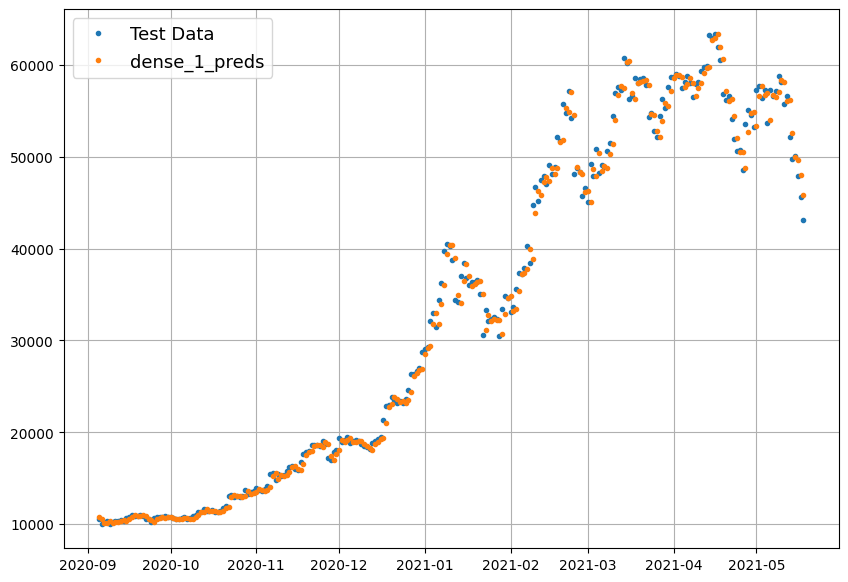

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_data):], values = test_labels[:, 0], start = OFFSET, legend_label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_data):], values = model_1_preds, start = OFFSET, legend_label = 'dense_1_preds')

In [ ]:
HORIZON = 1
WINDOW = 30

In [ ]:
windows, horizons = make_windows(btc_prices, WINDOW, HORIZON)

In [ ]:
train_data, test_data, train_labels, test_labels = make_train_test_split(windows, horizons)

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
], name = 'dense_2')

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['mae', 'mse'])

model_2_history = model_2.fit(x = train_data,
                              y = train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = BATCH_SIZE,
                              validation_data = (test_data, test_labels),
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_2.name), create_model_checkpoint(model_2.name)])

Saving TensorBoard log files to: model_logs/dense_2/20230630-083611
Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1099.4342 - mae: 1099.4342 - mse: 6194780.5000  
Epoch 1: val_loss improved from inf to 1838.23462, saving model to model_experiments/dense_2


18/18 [==============================] - 2s 54ms/step - loss: 875.0041 - mae: 875.0041 - mse: 4473994.5000 - val_loss: 1838.2346 - val_mae: 1838.2346 - val_mse: 8822302.0000
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 282.1010 - mae: 282.1010 - mse: 319418.0000
Epoch 2: val_loss improved from 1838.23462 to 1428.08521, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 31ms/step - loss: 281.1845 - mae: 281.1845 - mse: 317110.0938 - val_loss: 1428.0852 - val_mae: 1428.0852 - val_mse: 5215655.5000
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 197.4988 - mae: 197.4988 - mse: 186950.2500
Epoch 3: val_loss improved from 1428.08521 to 1295.64355, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 197.4988 - mae: 197.4988 - mse: 186950.2500 - val_loss: 1295.6436 - val_mae: 1295.6436 - val_mse: 5195681.5000
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 255.2275 - mae: 255.2275 - mse: 257470.8281
Epoch 4: val_loss did not improve from 1295.64355
18/18 [==============================] - 0s 6ms/step - loss: 257.8435 - mae: 257.8435 - mse: 260358.7656 - val_loss: 1641.5610 - val_mae: 1641.5610 - val_mse: 7108644.0000
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 221.2314 - mae: 221.2314 - mse: 216817.5469
Epoch 5: val_loss did not improve from 1295.64355
18/18 [==============================] - 0s 6ms/step - loss: 221.2314 - mae: 221.2314 - mse: 216817.5469 - val_loss: 2307.1531 - val_mae: 2307.1531 - val_mse: 12276960.0000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 237.4419 - mae: 237.4419 - mse: 226020.8750
Epoch 6: val_loss did not improve from 1295

18/18 [==============================] - 1s 33ms/step - loss: 209.3361 - mae: 209.3361 - mse: 180974.7500 - val_loss: 1077.5675 - val_mae: 1077.5675 - val_mse: 3087350.0000
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 177.0305 - mae: 177.0305 - mse: 145176.1094
Epoch 8: val_loss improved from 1077.56750 to 821.99561, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 177.0305 - mae: 177.0305 - mse: 145176.1094 - val_loss: 821.9956 - val_mae: 821.9956 - val_mse: 2347998.5000
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 167.3296 - mae: 167.3296 - mse: 129668.7422
Epoch 9: val_loss improved from 821.99561 to 793.82928, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 167.3296 - mae: 167.3296 - mse: 129668.7422 - val_loss: 793.8293 - val_mae: 793.8293 - val_mse: 2154444.0000
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 157.0179 - mae: 157.0179 - mse: 124366.3203
Epoch 10: val_loss did not improve from 793.82928
18/18 [==============================] - 0s 6ms/step - loss: 157.0179 - mae: 157.0179 - mse: 124366.3203 - val_loss: 853.8738 - val_mae: 853.8738 - val_mse: 2180132.7500
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 181.1193 - mae: 181.1193 - mse: 142694.1250
Epoch 11: val_loss did not improve from 793.82928
18/18 [==============================] - 0s 6ms/step - loss: 181.1193 - mae: 181.1193 - mse: 142694.1250 - val_loss: 1292.1414 - val_mae: 1292.1414 - val_mse: 4510256.0000
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 206.8407 - mae: 206.8407 - mse: 171155.2812
Epoch 12: val_loss did not improve from 793.8

18/18 [==============================] - 1s 32ms/step - loss: 146.3820 - mae: 146.3820 - mse: 106895.3281 - val_loss: 722.1307 - val_mae: 722.1307 - val_mse: 1787854.6250
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 135.7812 - mae: 135.7812 - mse: 91415.9297
Epoch 17: val_loss did not improve from 722.13068
18/18 [==============================] - 0s 6ms/step - loss: 137.2754 - mae: 137.2754 - mse: 96805.3047 - val_loss: 1270.6827 - val_mae: 1270.6827 - val_mse: 4328623.0000
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 187.0497 - mae: 187.0497 - mse: 140770.4688
Epoch 18: val_loss did not improve from 722.13068
18/18 [==============================] - 0s 6ms/step - loss: 187.4255 - mae: 187.4255 - mse: 141255.6719 - val_loss: 756.3116 - val_mae: 756.3116 - val_mse: 1954792.6250
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 160.3263 - mae: 160.3263 - mse: 119910.4531
Epoch 19: val_loss did not improve from 722.130

18/18 [==============================] - 1s 31ms/step - loss: 184.4754 - mae: 184.4754 - mse: 141663.0938 - val_loss: 692.9232 - val_mae: 692.9232 - val_mse: 1605596.0000
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 152.2210 - mae: 152.2210 - mse: 108630.5000
Epoch 22: val_loss did not improve from 692.92322
18/18 [==============================] - 0s 6ms/step - loss: 152.2210 - mae: 152.2210 - mse: 108630.5000 - val_loss: 1227.5532 - val_mae: 1227.5532 - val_mse: 4028178.5000
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 157.4619 - mae: 157.4619 - mse: 107367.6719
Epoch 23: val_loss did not improve from 692.92322
18/18 [==============================] - 0s 7ms/step - loss: 157.0436 - mae: 157.0436 - mse: 108110.5703 - val_loss: 699.6814 - val_mae: 699.6814 - val_mse: 1597518.6250
Epoch 24/100
15/18 [========================>.....] - ETA: 0s - loss: 174.1303 - mae: 174.1303 - mse: 126215.2266
Epoch 24: val_loss did not improve from 692.9

18/18 [==============================] - 1s 32ms/step - loss: 167.5373 - mae: 167.5373 - mse: 117753.2266 - val_loss: 677.8149 - val_mae: 677.8149 - val_mse: 1551060.7500
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 141.0831 - mae: 141.0831 - mse: 99211.0547
Epoch 27: val_loss did not improve from 677.81488
18/18 [==============================] - 0s 7ms/step - loss: 143.7294 - mae: 143.7294 - mse: 100417.1250 - val_loss: 1022.3163 - val_mae: 1022.3163 - val_mse: 2675226.2500
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 143.7969 - mae: 143.7969 - mse: 96740.9219
Epoch 28: val_loss did not improve from 677.81488
18/18 [==============================] - 0s 6ms/step - loss: 143.7969 - mae: 143.7969 - mse: 96740.9219 - val_loss: 688.6712 - val_mae: 688.6712 - val_mse: 1547302.5000
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 126.9000 - mae: 126.9000 - mse: 85981.9531 
Epoch 29: val_loss did not improve from 677.8148

18/18 [==============================] - 1s 33ms/step - loss: 163.6108 - mae: 163.6108 - mse: 119392.7266 - val_loss: 653.0331 - val_mae: 653.0331 - val_mse: 1410662.0000
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 135.4856 - mae: 135.4856 - mse: 91996.8281
Epoch 35: val_loss did not improve from 653.03308
18/18 [==============================] - 0s 7ms/step - loss: 135.2463 - mae: 135.2463 - mse: 91264.3438 - val_loss: 757.6465 - val_mae: 757.6465 - val_mse: 1707440.7500
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 141.3835 - mae: 141.3835 - mse: 99769.3750
Epoch 36: val_loss did not improve from 653.03308
18/18 [==============================] - 0s 6ms/step - loss: 141.3835 - mae: 141.3835 - mse: 99769.3750 - val_loss: 655.9929 - val_mae: 655.9929 - val_mse: 1502522.1250
Epoch 37/100
17/18 [===========================>..] - ETA: 0s - loss: 126.4670 - mae: 126.4670 - mse: 86759.5469
Epoch 37: val_loss did not improve from 653.03308
18

18/18 [==============================] - 1s 31ms/step - loss: 127.2150 - mae: 127.2150 - mse: 87564.4375 - val_loss: 649.8324 - val_mae: 649.8324 - val_mse: 1470124.0000
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 128.1073 - mae: 128.1073 - mse: 91983.2422 
Epoch 39: val_loss did not improve from 649.83240
18/18 [==============================] - 0s 6ms/step - loss: 128.9432 - mae: 128.9432 - mse: 92281.3281 - val_loss: 687.9869 - val_mae: 687.9869 - val_mse: 1505347.3750
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 138.2285 - mae: 138.2285 - mse: 95667.3359
Epoch 40: val_loss improved from 649.83240 to 630.65112, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 136.1432 - mae: 136.1432 - mse: 91612.3828 - val_loss: 630.6511 - val_mae: 630.6511 - val_mse: 1378676.6250
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 141.7600 - mae: 141.7600 - mse: 96215.3125
Epoch 41: val_loss did not improve from 630.65112
18/18 [==============================] - 0s 6ms/step - loss: 141.7600 - mae: 141.7600 - mse: 96215.3125 - val_loss: 653.9850 - val_mae: 653.9850 - val_mse: 1453653.5000
Epoch 42/100
18/18 [==============================] - ETA: 0s - loss: 126.0606 - mae: 126.0606 - mse: 81115.1719
Epoch 42: val_loss did not improve from 630.65112
18/18 [==============================] - 0s 6ms/step - loss: 126.0606 - mae: 126.0606 - mse: 81115.1719 - val_loss: 1154.3900 - val_mae: 1154.3900 - val_mse: 3457191.0000
Epoch 43/100
10/18 [===============>..............] - ETA: 0s - loss: 169.2042 - mae: 169.2042 - mse: 115467.8906
Epoch 43: val_loss did not improve from 630.65112


18/18 [==============================] - 1s 38ms/step - loss: 123.8398 - mae: 123.8398 - mse: 82506.4219 - val_loss: 630.1276 - val_mae: 630.1276 - val_mse: 1348237.3750
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 129.3249 - mae: 129.3249 - mse: 84450.3359
Epoch 55: val_loss improved from 630.12762 to 623.97455, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 129.3014 - mae: 129.3014 - mse: 84772.4219 - val_loss: 623.9745 - val_mae: 623.9745 - val_mse: 1361276.6250
Epoch 56/100
16/18 [=========================>....] - ETA: 0s - loss: 122.6005 - mae: 122.6005 - mse: 78938.1250
Epoch 56: val_loss did not improve from 623.97455
18/18 [==============================] - 0s 7ms/step - loss: 124.9798 - mae: 124.9798 - mse: 82342.9062 - val_loss: 633.2864 - val_mae: 633.2864 - val_mse: 1335490.1250
Epoch 57/100
17/18 [===========================>..] - ETA: 0s - loss: 130.1405 - mae: 130.1405 - mse: 88627.1406
Epoch 57: val_loss did not improve from 623.97455
18/18 [==============================] - 0s 6ms/step - loss: 129.9482 - mae: 129.9482 - mse: 88075.0938 - val_loss: 812.2726 - val_mae: 812.2726 - val_mse: 1842782.7500
Epoch 58/100
16/18 [=========================>....] - ETA: 0s - loss: 130.8392 - mae: 130.8392 - mse: 81258.3359
Epoch 58: val_loss improved from 623.97455 to 611.259

18/18 [==============================] - 1s 32ms/step - loss: 131.4474 - mae: 131.4474 - mse: 84920.2969 - val_loss: 611.2599 - val_mae: 611.2599 - val_mse: 1314611.3750
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 138.0167 - mae: 138.0167 - mse: 89710.4375
Epoch 59: val_loss did not improve from 611.25995
18/18 [==============================] - 0s 6ms/step - loss: 137.3882 - mae: 137.3882 - mse: 88828.5234 - val_loss: 840.3782 - val_mae: 840.3782 - val_mse: 2056558.6250
Epoch 60/100
17/18 [===========================>..] - ETA: 0s - loss: 137.4226 - mae: 137.4226 - mse: 91777.8359
Epoch 60: val_loss did not improve from 611.25995
18/18 [==============================] - 0s 6ms/step - loss: 137.1674 - mae: 137.1674 - mse: 91633.6406 - val_loss: 904.9749 - val_mae: 904.9749 - val_mse: 2284399.7500
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 158.6835 - mae: 158.6835 - mse: 108535.0156
Epoch 61: val_loss did not improve from 611.25995
18

18/18 [==============================] - 1s 71ms/step - loss: 128.0823 - mae: 128.0823 - mse: 84771.3438 - val_loss: 608.9598 - val_mae: 608.9598 - val_mse: 1290144.7500
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 123.6867 - mae: 123.6867 - mse: 85441.5234
Epoch 72: val_loss did not improve from 608.95978
18/18 [==============================] - 0s 7ms/step - loss: 120.5294 - mae: 120.5294 - mse: 80880.7500 - val_loss: 694.4686 - val_mae: 694.4686 - val_mse: 1522651.6250
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 135.4896 - mae: 135.4896 - mse: 90491.0625 
Epoch 73: val_loss did not improve from 608.95978
18/18 [==============================] - 0s 6ms/step - loss: 135.9381 - mae: 135.9381 - mse: 90662.7422 - val_loss: 630.0033 - val_mae: 630.0033 - val_mse: 1341580.1250
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 124.6140 - mae: 124.6140 - mse: 81801.7266
Epoch 74: val_loss did not improve from 608.95978
18

18/18 [==============================] - 1s 34ms/step - loss: 118.1650 - mae: 118.1650 - mse: 73466.5703 - val_loss: 604.9462 - val_mae: 604.9462 - val_mse: 1274583.8750
Epoch 78/100
11/18 [=================>............] - ETA: 0s - loss: 116.6089 - mae: 116.6089 - mse: 75438.2422 
Epoch 78: val_loss did not improve from 604.94623
18/18 [==============================] - 0s 7ms/step - loss: 119.3564 - mae: 119.3564 - mse: 77596.2656 - val_loss: 676.4536 - val_mae: 676.4536 - val_mse: 1472834.1250
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 136.2903 - mae: 136.2903 - mse: 90107.7500
Epoch 79: val_loss did not improve from 604.94623
18/18 [==============================] - 0s 6ms/step - loss: 135.5663 - mae: 135.5663 - mse: 89309.1094 - val_loss: 710.4769 - val_mae: 710.4769 - val_mse: 1518413.8750
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 116.2864 - mae: 116.2864 - mse: 76288.8516
Epoch 80: val_loss did not improve from 604.94623
18

18/18 [==============================] - 1s 33ms/step - loss: 124.1882 - mae: 124.1882 - mse: 80157.4766 - val_loss: 602.7399 - val_mae: 602.7399 - val_mse: 1271994.3750
Epoch 92/100
16/18 [=========================>....] - ETA: 0s - loss: 121.1078 - mae: 121.1078 - mse: 70938.6953
Epoch 92: val_loss did not improve from 602.73993
18/18 [==============================] - 0s 6ms/step - loss: 124.3859 - mae: 124.3859 - mse: 76378.2188 - val_loss: 683.2917 - val_mae: 683.2917 - val_mse: 1447548.7500
Epoch 93/100
17/18 [===========================>..] - ETA: 0s - loss: 161.5014 - mae: 161.5014 - mse: 116014.0859
Epoch 93: val_loss did not improve from 602.73993
18/18 [==============================] - 0s 6ms/step - loss: 163.1080 - mae: 163.1080 - mse: 117059.9531 - val_loss: 634.3510 - val_mae: 634.3510 - val_mse: 1318532.2500
Epoch 94/100
17/18 [===========================>..] - ETA: 0s - loss: 167.1791 - mae: 167.1791 - mse: 121840.9375
Epoch 94: val_loss did not improve from 602.73993


In [ ]:
model_2.evaluate(test_data, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1416.5668 - mae: 1416.5668 - mse: 4342121.0000


[1416.5667724609375, 1416.5667724609375, 4342121.0]

In [ ]:
model_2_preds = make_preds(model_2, test_data)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = calculate_forecast_results(y_true = tf.squeeze(test_labels),
                                            y_pred = model_2_preds)
model_2_results

{'mae': 1416.5668,
 'mse': 4342121.0,
 'rmse': 2083.7756,
 'mape': 7.0732822,
 'mase': 2.4761727}

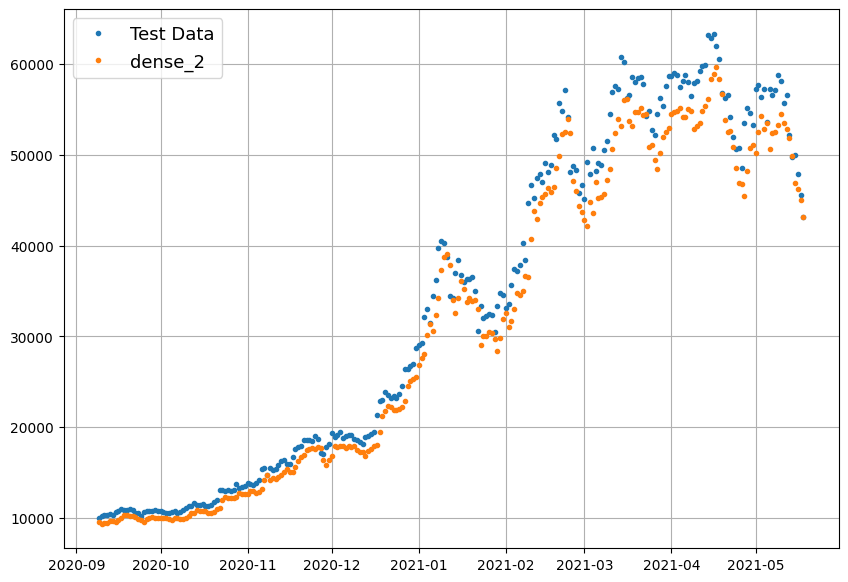

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_data):], values = test_labels[:, 0], start = OFFSET, legend_label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_data):], values = model_2_preds, start = OFFSET, legend_label = 'dense_2')

In [ ]:
HORIZON = 7
WINDOW = 30

In [ ]:
windows, horizons = make_windows(btc_prices, WINDOW, HORIZON)

In [ ]:
train_data, test_data, train_labels, test_labels = make_train_test_split(windows, horizons)

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'linear')
], name = 'dense_3')

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['mae', 'mse'])

model_3_history = model_3.fit(x = train_data,
                              y = train_labels,
                              epochs = 100,
                              verbose = 1,
                              batch_size = BATCH_SIZE,
                              validation_data = (test_data, test_labels),
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_2.name), create_model_checkpoint(model_2.name)])

Saving TensorBoard log files to: model_logs/dense_2/20230630-083635
Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 1438.4102 - mae: 1438.4102 - mse: 9038528.0000  
Epoch 1: val_loss improved from inf to 4657.45850, saving model to model_experiments/dense_2


18/18 [==============================] - 2s 61ms/step - loss: 1199.7302 - mae: 1199.7302 - mse: 6887274.0000 - val_loss: 4657.4585 - val_mae: 4657.4585 - val_mse: 57604988.0000
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 571.8956 - mae: 571.8956 - mse: 1471931.3750
Epoch 2: val_loss improved from 4657.45850 to 2858.85132, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 37ms/step - loss: 544.4358 - mae: 544.4358 - mse: 1338709.8750 - val_loss: 2858.8513 - val_mae: 2858.8513 - val_mse: 22973686.0000
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 426.4564 - mae: 426.4564 - mse: 859459.1250
Epoch 3: val_loss improved from 2858.85132 to 1880.08081, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 424.5374 - mae: 424.5374 - mse: 847213.0625 - val_loss: 1880.0808 - val_mae: 1880.0808 - val_mse: 10905768.0000
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 376.4482 - mae: 376.4482 - mse: 650264.8750
Epoch 4: val_loss did not improve from 1880.08081
18/18 [==============================] - 0s 7ms/step - loss: 378.5061 - mae: 378.5061 - mse: 657199.3125 - val_loss: 1937.6982 - val_mae: 1937.6982 - val_mse: 10970589.0000
Epoch 5/100
15/18 [========================>.....] - ETA: 0s - loss: 342.2218 - mae: 342.2218 - mse: 522681.1250
Epoch 5: val_loss improved from 1880.08081 to 1554.99976, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 35ms/step - loss: 332.5107 - mae: 332.5107 - mse: 506313.4375 - val_loss: 1554.9998 - val_mae: 1554.9998 - val_mse: 7683478.5000
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 304.0875 - mae: 304.0875 - mse: 451325.7812
Epoch 6: val_loss did not improve from 1554.99976
18/18 [==============================] - 0s 7ms/step - loss: 302.1492 - mae: 302.1492 - mse: 439651.2500 - val_loss: 1622.8126 - val_mae: 1622.8126 - val_mse: 8068952.5000
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 287.5583 - mae: 287.5583 - mse: 411748.2500
Epoch 7: val_loss did not improve from 1554.99976
18/18 [==============================] - 0s 6ms/step - loss: 287.5583 - mae: 287.5583 - mse: 411748.2500 - val_loss: 1600.5553 - val_mae: 1600.5553 - val_mse: 7965338.5000
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 275.8614 - mae: 275.8614 - mse: 382264.4375
Epoch 8: val_loss improved from 1554.99976 t

18/18 [==============================] - 1s 33ms/step - loss: 275.6035 - mae: 275.6035 - mse: 381416.9688 - val_loss: 1519.0747 - val_mae: 1519.0747 - val_mse: 7326371.5000
Epoch 9/100
17/18 [===========================>..] - ETA: 0s - loss: 274.4342 - mae: 274.4342 - mse: 378357.4062
Epoch 9: val_loss did not improve from 1519.07471
18/18 [==============================] - 0s 6ms/step - loss: 274.4053 - mae: 274.4053 - mse: 378089.5312 - val_loss: 1619.2471 - val_mae: 1619.2471 - val_mse: 7743453.5000
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 286.7184 - mae: 286.7184 - mse: 395216.0000
Epoch 10: val_loss did not improve from 1519.07471
18/18 [==============================] - 0s 7ms/step - loss: 287.2877 - mae: 287.2877 - mse: 395753.3125 - val_loss: 1639.7267 - val_mae: 1639.7267 - val_mse: 7902687.5000
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 270.0541 - mae: 270.0541 - mse: 368825.8438
Epoch 11: val_loss did not improve from 1

18/18 [==============================] - 1s 33ms/step - loss: 292.3973 - mae: 292.3973 - mse: 395728.4688 - val_loss: 1470.7032 - val_mae: 1470.7032 - val_mse: 6813183.0000
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 268.8530 - mae: 268.8530 - mse: 347435.9375
Epoch 15: val_loss improved from 1470.70325 to 1417.85388, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 33ms/step - loss: 268.6886 - mae: 268.6886 - mse: 347027.3750 - val_loss: 1417.8539 - val_mae: 1417.8539 - val_mse: 6515016.0000
Epoch 16/100
17/18 [===========================>..] - ETA: 0s - loss: 256.5364 - mae: 256.5364 - mse: 339056.7500
Epoch 16: val_loss did not improve from 1417.85388
18/18 [==============================] - 0s 6ms/step - loss: 256.1195 - mae: 256.1195 - mse: 337666.8750 - val_loss: 1558.2573 - val_mae: 1558.2573 - val_mse: 7206233.0000
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 250.6903 - mae: 250.6903 - mse: 326582.3125
Epoch 17: val_loss improved from 1417.85388 to 1363.55530, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 32ms/step - loss: 251.6305 - mae: 251.6305 - mse: 326423.8438 - val_loss: 1363.5553 - val_mae: 1363.5553 - val_mse: 6489438.5000
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 254.8944 - mae: 254.8944 - mse: 329916.8125
Epoch 18: val_loss improved from 1363.55530 to 1344.30066, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 33ms/step - loss: 253.7776 - mae: 253.7776 - mse: 327390.9375 - val_loss: 1344.3007 - val_mae: 1344.3007 - val_mse: 6169347.0000
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 261.0042 - mae: 261.0042 - mse: 335367.7500
Epoch 19: val_loss did not improve from 1344.30066
18/18 [==============================] - 0s 6ms/step - loss: 260.7674 - mae: 260.7674 - mse: 333718.5938 - val_loss: 1379.5903 - val_mae: 1379.5903 - val_mse: 6198157.5000
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 245.8977 - mae: 245.8977 - mse: 317608.9375
Epoch 20: val_loss did not improve from 1344.30066
18/18 [==============================] - 0s 6ms/step - loss: 245.0618 - mae: 245.0618 - mse: 315442.2500 - val_loss: 1375.7513 - val_mae: 1375.7513 - val_mse: 6312755.0000
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 255.6078 - mae: 255.6078 - mse: 325395.0312
Epoch 21: val_loss did not improve from

18/18 [==============================] - 1s 32ms/step - loss: 261.5771 - mae: 261.5771 - mse: 322897.7188 - val_loss: 1343.8838 - val_mae: 1343.8838 - val_mse: 6262098.5000
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 242.0450 - mae: 242.0450 - mse: 301466.8750
Epoch 30: val_loss improved from 1343.88379 to 1318.14343, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 33ms/step - loss: 242.7380 - mae: 242.7380 - mse: 303949.1250 - val_loss: 1318.1434 - val_mae: 1318.1434 - val_mse: 6071860.5000
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 253.0860 - mae: 253.0860 - mse: 313649.5312
Epoch 31: val_loss did not improve from 1318.14343
18/18 [==============================] - 0s 6ms/step - loss: 251.8857 - mae: 251.8857 - mse: 311335.5000 - val_loss: 1453.1359 - val_mae: 1453.1359 - val_mse: 6622867.5000
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 244.1774 - mae: 244.1774 - mse: 303881.8125
Epoch 32: val_loss did not improve from 1318.14343
18/18 [==============================] - 0s 6ms/step - loss: 244.5661 - mae: 244.5661 - mse: 303902.7500 - val_loss: 1344.6755 - val_mae: 1344.6755 - val_mse: 6167755.5000
Epoch 33/100
18/18 [==============================] - ETA: 0s - loss: 240.4079 - mae: 240.4079 - mse: 302174.7188
Epoch 33: val_loss did not improve from

18/18 [==============================] - 1s 32ms/step - loss: 239.4047 - mae: 239.4047 - mse: 296872.3125 - val_loss: 1282.0842 - val_mae: 1282.0842 - val_mse: 5824159.0000
Epoch 37/100
14/18 [======================>.......] - ETA: 0s - loss: 247.9837 - mae: 247.9837 - mse: 323473.5625
Epoch 37: val_loss did not improve from 1282.08423
18/18 [==============================] - 0s 7ms/step - loss: 245.0905 - mae: 245.0905 - mse: 308009.0625 - val_loss: 1344.4141 - val_mae: 1344.4141 - val_mse: 5906627.5000
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 229.6332 - mae: 229.6332 - mse: 283344.8438
Epoch 38: val_loss improved from 1282.08423 to 1280.00830, saving model to model_experiments/dense_2


18/18 [==============================] - 1s 33ms/step - loss: 228.6508 - mae: 228.6508 - mse: 281478.5312 - val_loss: 1280.0083 - val_mae: 1280.0083 - val_mse: 5634811.5000
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 231.8598 - mae: 231.8598 - mse: 286692.7500
Epoch 39: val_loss did not improve from 1280.00830
18/18 [==============================] - 0s 6ms/step - loss: 233.2859 - mae: 233.2859 - mse: 288238.1875 - val_loss: 1342.6433 - val_mae: 1342.6433 - val_mse: 6207491.0000
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 242.5336 - mae: 242.5336 - mse: 292355.4375
Epoch 40: val_loss did not improve from 1280.00830
18/18 [==============================] - 0s 10ms/step - loss: 242.5336 - mae: 242.5336 - mse: 292355.4375 - val_loss: 1348.2650 - val_mae: 1348.2650 - val_mse: 5989355.5000
Epoch 41/100
11/18 [=================>............] - ETA: 0s - loss: 233.5353 - mae: 233.5353 - mse: 289575.4688
Epoch 41: val_loss did not improve fro

18/18 [==============================] - 1s 47ms/step - loss: 254.3072 - mae: 254.3072 - mse: 307806.1875 - val_loss: 1279.8678 - val_mae: 1279.8678 - val_mse: 5614344.5000
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 227.8566 - mae: 227.8566 - mse: 298619.1562
Epoch 46: val_loss did not improve from 1279.86780
18/18 [==============================] - 0s 8ms/step - loss: 230.4997 - mae: 230.4997 - mse: 284812.0000 - val_loss: 1381.9036 - val_mae: 1381.9036 - val_mse: 6429811.5000
Epoch 47/100
12/18 [===================>..........] - ETA: 0s - loss: 285.0068 - mae: 285.0068 - mse: 372751.7500
Epoch 47: val_loss did not improve from 1279.86780
18/18 [==============================] - 0s 9ms/step - loss: 275.0293 - mae: 275.0293 - mse: 348725.8125 - val_loss: 1892.1847 - val_mae: 1892.1847 - val_mse: 9359126.0000
Epoch 48/100
12/18 [===================>..........] - ETA: 0s - loss: 260.2270 - mae: 260.2270 - mse: 312797.5938
Epoch 48: val_loss did not improve from

18/18 [==============================] - 1s 36ms/step - loss: 228.9338 - mae: 228.9338 - mse: 275648.4688 - val_loss: 1277.4792 - val_mae: 1277.4792 - val_mse: 5506738.5000
Epoch 50/100
17/18 [===========================>..] - ETA: 0s - loss: 228.1270 - mae: 228.1270 - mse: 277661.0000
Epoch 50: val_loss did not improve from 1277.47925
18/18 [==============================] - 0s 6ms/step - loss: 228.4695 - mae: 228.4695 - mse: 277912.9688 - val_loss: 1398.7341 - val_mae: 1398.7341 - val_mse: 6341480.5000
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 232.5672 - mae: 232.5672 - mse: 283807.5938
Epoch 51: val_loss did not improve from 1277.47925
18/18 [==============================] - 0s 6ms/step - loss: 233.5031 - mae: 233.5031 - mse: 284087.8438 - val_loss: 1389.5020 - val_mae: 1389.5020 - val_mse: 6200192.0000
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 224.5446 - mae: 224.5446 - mse: 274096.4688
Epoch 52: val_loss did not improve from

18/18 [==============================] - 1s 32ms/step - loss: 236.6879 - mae: 236.6879 - mse: 286636.5625 - val_loss: 1269.0848 - val_mae: 1269.0848 - val_mse: 5489382.5000
Epoch 56/100
17/18 [===========================>..] - ETA: 0s - loss: 227.3319 - mae: 227.3319 - mse: 271581.5625
Epoch 56: val_loss did not improve from 1269.08484
18/18 [==============================] - 0s 6ms/step - loss: 227.7210 - mae: 227.7210 - mse: 272479.9062 - val_loss: 1726.1625 - val_mae: 1726.1625 - val_mse: 8348145.0000
Epoch 57/100
18/18 [==============================] - ETA: 0s - loss: 270.4298 - mae: 270.4298 - mse: 335250.0312
Epoch 57: val_loss did not improve from 1269.08484
18/18 [==============================] - 0s 6ms/step - loss: 270.4298 - mae: 270.4298 - mse: 335250.0312 - val_loss: 1479.7043 - val_mae: 1479.7043 - val_mse: 7046449.5000
Epoch 58/100
17/18 [===========================>..] - ETA: 0s - loss: 242.4061 - mae: 242.4061 - mse: 296031.3750
Epoch 58: val_loss did not improve from

18/18 [==============================] - 1s 33ms/step - loss: 238.7106 - mae: 238.7106 - mse: 287330.5625 - val_loss: 1261.7533 - val_mae: 1261.7533 - val_mse: 5512893.5000
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 237.9384 - mae: 237.9384 - mse: 286963.1250
Epoch 60: val_loss did not improve from 1261.75330
18/18 [==============================] - 0s 8ms/step - loss: 234.6884 - mae: 234.6884 - mse: 280192.9062 - val_loss: 1497.6953 - val_mae: 1497.6953 - val_mse: 6434286.5000
Epoch 61/100
16/18 [=========================>....] - ETA: 0s - loss: 236.1166 - mae: 236.1166 - mse: 276055.1875
Epoch 61: val_loss did not improve from 1261.75330
18/18 [==============================] - 0s 6ms/step - loss: 241.3921 - mae: 241.3921 - mse: 284201.8438 - val_loss: 1282.9791 - val_mae: 1282.9791 - val_mse: 5587126.0000
Epoch 62/100
17/18 [===========================>..] - ETA: 0s - loss: 227.9917 - mae: 227.9917 - mse: 273346.9688
Epoch 62: val_loss did not improve from

18/18 [==============================] - 1s 32ms/step - loss: 233.8233 - mae: 233.8233 - mse: 280061.6562 - val_loss: 1253.9871 - val_mae: 1253.9871 - val_mse: 5601792.5000
Epoch 67/100
17/18 [===========================>..] - ETA: 0s - loss: 223.2886 - mae: 223.2886 - mse: 269574.2812
Epoch 67: val_loss did not improve from 1253.98706
18/18 [==============================] - 0s 6ms/step - loss: 223.0710 - mae: 223.0710 - mse: 268219.4062 - val_loss: 1434.6088 - val_mae: 1434.6088 - val_mse: 6239089.0000
Epoch 68/100
17/18 [===========================>..] - ETA: 0s - loss: 227.1290 - mae: 227.1290 - mse: 273381.2500
Epoch 68: val_loss did not improve from 1253.98706
18/18 [==============================] - 0s 6ms/step - loss: 226.3790 - mae: 226.3790 - mse: 271727.2812 - val_loss: 1373.4108 - val_mae: 1373.4108 - val_mse: 5933301.0000
Epoch 69/100
17/18 [===========================>..] - ETA: 0s - loss: 224.5856 - mae: 224.5856 - mse: 268992.3750
Epoch 69: val_loss did not improve from

18/18 [==============================] - 1s 33ms/step - loss: 223.7936 - mae: 223.7936 - mse: 270514.7500 - val_loss: 1234.0599 - val_mae: 1234.0599 - val_mse: 5350628.5000
Epoch 72/100
17/18 [===========================>..] - ETA: 0s - loss: 232.8632 - mae: 232.8632 - mse: 282143.3750
Epoch 72: val_loss did not improve from 1234.05994
18/18 [==============================] - 0s 6ms/step - loss: 232.1583 - mae: 232.1583 - mse: 280463.1250 - val_loss: 1324.0880 - val_mae: 1324.0880 - val_mse: 5542069.0000
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 231.3082 - mae: 231.3082 - mse: 278149.8125
Epoch 73: val_loss did not improve from 1234.05994
18/18 [==============================] - 0s 6ms/step - loss: 231.6517 - mae: 231.6517 - mse: 278500.8125 - val_loss: 1240.9819 - val_mae: 1240.9819 - val_mse: 5276330.0000
Epoch 74/100
17/18 [===========================>..] - ETA: 0s - loss: 222.8819 - mae: 222.8819 - mse: 266569.7188
Epoch 74: val_loss did not improve from

18/18 [==============================] - 1s 32ms/step - loss: 251.8797 - mae: 251.8797 - mse: 302080.2188 - val_loss: 1198.5504 - val_mae: 1198.5504 - val_mse: 5019848.0000
Epoch 78/100
17/18 [===========================>..] - ETA: 0s - loss: 247.5779 - mae: 247.5779 - mse: 301650.0000
Epoch 78: val_loss did not improve from 1198.55042
18/18 [==============================] - 0s 6ms/step - loss: 247.5613 - mae: 247.5613 - mse: 302323.4062 - val_loss: 1682.7389 - val_mae: 1682.7389 - val_mse: 7661845.5000
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 232.2202 - mae: 232.2202 - mse: 284288.7500
Epoch 79: val_loss did not improve from 1198.55042
18/18 [==============================] - 0s 7ms/step - loss: 233.1234 - mae: 233.1234 - mse: 284837.0000 - val_loss: 1333.1776 - val_mae: 1333.1776 - val_mse: 5814818.0000
Epoch 80/100
17/18 [===========================>..] - ETA: 0s - loss: 253.7176 - mae: 253.7176 - mse: 312524.4062
Epoch 80: val_loss did not improve from

In [ ]:
model_3.evaluate(test_data, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1256.0513 - mae: 1256.0513 - mse: 5451427.5000


[1256.05126953125, 1256.05126953125, 5451427.5]

In [ ]:
model_3_preds = make_preds(model_3, test_data)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_3_results = calculate_forecast_results(y_true = tf.squeeze(test_labels),
                                            y_pred = model_3_preds)
model_3_results

{'mae': 1256.0513,
 'mse': 5451426.5,
 'rmse': 1434.981,
 'mape': 5.5738273,
 'mase': 2.235073}

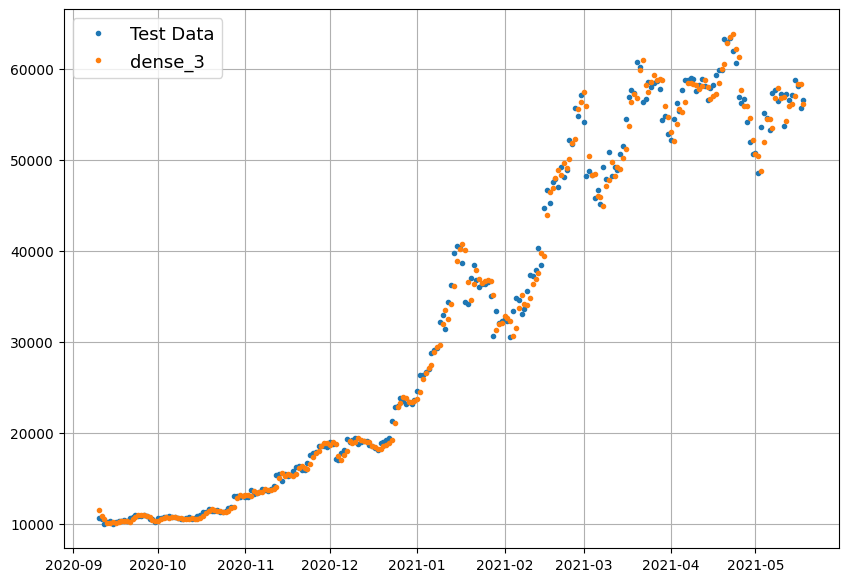

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_data):], values = test_labels[:, 0], start = OFFSET, legend_label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_data):], values = model_3_preds[:, 0], start = OFFSET, legend_label = 'dense_3')

In [ ]:
HORIZON = 1
WINDOW = 7

In [ ]:
windows, horizons = make_windows(btc_prices, WINDOW, HORIZON)

In [ ]:
train_data, test_data, train_labels, test_labels = make_train_test_split(windows, horizons)

In [ ]:
x = tf.constant(train_data[0])

In [ ]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [ ]:
print(f'Original shape : {x.shape}')
print(f'Expanded shape : {expand_dims_layer(x).shape}')

Original shape : (7,)
Expanded shape : (7, 1)


In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(128, 7, padding = 'causal', strides = 1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
], name = 'conv1d')

In [ ]:
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['accuracy'])

In [ ]:
model_4_history = model_4.fit(train_data,
                              train_labels,
                              epochs = 100,
                              validation_data = (test_data, test_labels),
                              verbose = 1,
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_4.name), create_model_checkpoint(model_4.name)])

Saving TensorBoard log files to: model_logs/conv1d/20230630-083700
Epoch 1/100
69/70 [============================>.] - ETA: 0s - loss: 383.0654 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 931.70465, saving model to model_experiments/conv1d


70/70 [==============================] - 3s 22ms/step - loss: 381.6317 - accuracy: 0.0000e+00 - val_loss: 931.7047 - val_accuracy: 0.0000e+00
Epoch 2/100
67/70 [===========================>..] - ETA: 0s - loss: 172.8949 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 931.70465 to 921.34692, saving model to model_experiments/conv1d


70/70 [==============================] - 1s 14ms/step - loss: 174.3148 - accuracy: 0.0000e+00 - val_loss: 921.3469 - val_accuracy: 0.0000e+00
Epoch 3/100
67/70 [===========================>..] - ETA: 0s - loss: 154.0273 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 921.34692
70/70 [==============================] - 0s 5ms/step - loss: 154.9517 - accuracy: 0.0000e+00 - val_loss: 949.0099 - val_accuracy: 0.0000e+00
Epoch 4/100
61/70 [=========================>....] - ETA: 0s - loss: 150.9996 - accuracy: 0.0000e+00
Epoch 4: val_loss improved from 921.34692 to 822.15436, saving model to model_experiments/conv1d


70/70 [==============================] - 2s 23ms/step - loss: 151.7482 - accuracy: 0.0000e+00 - val_loss: 822.1544 - val_accuracy: 0.0000e+00
Epoch 5/100
57/70 [=======================>......] - ETA: 0s - loss: 148.8898 - accuracy: 0.0000e+00
Epoch 5: val_loss improved from 822.15436 to 704.07916, saving model to model_experiments/conv1d


70/70 [==============================] - 1s 14ms/step - loss: 145.8056 - accuracy: 0.0000e+00 - val_loss: 704.0792 - val_accuracy: 0.0000e+00
Epoch 6/100
61/70 [=========================>....] - ETA: 0s - loss: 150.8588 - accuracy: 0.0000e+00
Epoch 6: val_loss did not improve from 704.07916
70/70 [==============================] - 0s 5ms/step - loss: 149.7040 - accuracy: 0.0000e+00 - val_loss: 881.0904 - val_accuracy: 0.0000e+00
Epoch 7/100
59/70 [========================>.....] - ETA: 0s - loss: 150.2373 - accuracy: 0.0000e+00
Epoch 7: val_loss improved from 704.07916 to 657.80157, saving model to model_experiments/conv1d


70/70 [==============================] - 1s 14ms/step - loss: 146.1869 - accuracy: 0.0000e+00 - val_loss: 657.8016 - val_accuracy: 0.0000e+00
Epoch 8/100
61/70 [=========================>....] - ETA: 0s - loss: 137.4621 - accuracy: 0.0000e+00
Epoch 8: val_loss did not improve from 657.80157
70/70 [==============================] - 0s 5ms/step - loss: 136.5232 - accuracy: 0.0000e+00 - val_loss: 697.4611 - val_accuracy: 0.0000e+00
Epoch 9/100
59/70 [========================>.....] - ETA: 0s - loss: 137.2010 - accuracy: 0.0000e+00
Epoch 9: val_loss did not improve from 657.80157
70/70 [==============================] - 0s 5ms/step - loss: 137.1828 - accuracy: 0.0000e+00 - val_loss: 886.0590 - val_accuracy: 0.0000e+00
Epoch 10/100
67/70 [===========================>..] - ETA: 0s - loss: 146.3560 - accuracy: 0.0000e+00
Epoch 10: val_loss did not improve from 657.80157
70/70 [==============================] - 0s 5ms/step - loss: 146.0169 - accuracy: 0.0000e+00 - val_loss: 1372.3461 - val_acc

70/70 [==============================] - 1s 14ms/step - loss: 137.8209 - accuracy: 0.0000e+00 - val_loss: 642.9433 - val_accuracy: 0.0000e+00
Epoch 12/100
59/70 [========================>.....] - ETA: 0s - loss: 119.0442 - accuracy: 0.0000e+00
Epoch 12: val_loss did not improve from 642.94330
70/70 [==============================] - 0s 5ms/step - loss: 120.1980 - accuracy: 0.0000e+00 - val_loss: 1176.4989 - val_accuracy: 0.0000e+00
Epoch 13/100
58/70 [=======================>......] - ETA: 0s - loss: 132.4254 - accuracy: 0.0000e+00
Epoch 13: val_loss did not improve from 642.94330
70/70 [==============================] - 0s 5ms/step - loss: 134.3305 - accuracy: 0.0000e+00 - val_loss: 655.2889 - val_accuracy: 0.0000e+00
Epoch 14/100
68/70 [============================>.] - ETA: 0s - loss: 116.7266 - accuracy: 0.0000e+00
Epoch 14: val_loss did not improve from 642.94330
70/70 [==============================] - 0s 6ms/step - loss: 117.4051 - accuracy: 0.0000e+00 - val_loss: 677.2634 - val

70/70 [==============================] - 2s 34ms/step - loss: 117.3536 - accuracy: 0.0000e+00 - val_loss: 591.3878 - val_accuracy: 0.0000e+00
Epoch 16/100
65/70 [==========================>...] - ETA: 0s - loss: 117.8532 - accuracy: 0.0000e+00
Epoch 16: val_loss did not improve from 591.38782
70/70 [==============================] - 1s 10ms/step - loss: 117.5398 - accuracy: 0.0000e+00 - val_loss: 834.7906 - val_accuracy: 0.0000e+00
Epoch 17/100
68/70 [============================>.] - ETA: 0s - loss: 126.1715 - accuracy: 0.0000e+00
Epoch 17: val_loss did not improve from 591.38782
70/70 [==============================] - 1s 8ms/step - loss: 125.8958 - accuracy: 0.0000e+00 - val_loss: 595.3049 - val_accuracy: 0.0000e+00
Epoch 18/100
60/70 [========================>.....] - ETA: 0s - loss: 120.8812 - accuracy: 0.0000e+00
Epoch 18: val_loss did not improve from 591.38782
70/70 [==============================] - 0s 5ms/step - loss: 127.1059 - accuracy: 0.0000e+00 - val_loss: 665.2271 - val

70/70 [==============================] - 1s 13ms/step - loss: 112.2906 - accuracy: 0.0000e+00 - val_loss: 590.5036 - val_accuracy: 0.0000e+00
Epoch 25/100
60/70 [========================>.....] - ETA: 0s - loss: 123.0984 - accuracy: 0.0000e+00
Epoch 25: val_loss improved from 590.50360 to 588.92627, saving model to model_experiments/conv1d


70/70 [==============================] - 1s 13ms/step - loss: 121.4955 - accuracy: 0.0000e+00 - val_loss: 588.9263 - val_accuracy: 0.0000e+00
Epoch 26/100
59/70 [========================>.....] - ETA: 0s - loss: 115.1221 - accuracy: 0.0000e+00
Epoch 26: val_loss did not improve from 588.92627
70/70 [==============================] - 0s 5ms/step - loss: 114.7875 - accuracy: 0.0000e+00 - val_loss: 615.6197 - val_accuracy: 0.0000e+00
Epoch 27/100
70/70 [==============================] - ETA: 0s - loss: 115.9066 - accuracy: 0.0000e+00
Epoch 27: val_loss improved from 588.92627 to 584.35431, saving model to model_experiments/conv1d


70/70 [==============================] - 1s 14ms/step - loss: 115.9066 - accuracy: 0.0000e+00 - val_loss: 584.3543 - val_accuracy: 0.0000e+00
Epoch 28/100
70/70 [==============================] - ETA: 0s - loss: 121.6216 - accuracy: 0.0000e+00
Epoch 28: val_loss did not improve from 584.35431
70/70 [==============================] - 0s 5ms/step - loss: 121.6216 - accuracy: 0.0000e+00 - val_loss: 593.7023 - val_accuracy: 0.0000e+00
Epoch 29/100
58/70 [=======================>......] - ETA: 0s - loss: 128.0635 - accuracy: 0.0000e+00
Epoch 29: val_loss did not improve from 584.35431
70/70 [==============================] - 0s 5ms/step - loss: 125.5273 - accuracy: 0.0000e+00 - val_loss: 600.2067 - val_accuracy: 0.0000e+00
Epoch 30/100
58/70 [=======================>......] - ETA: 0s - loss: 118.0574 - accuracy: 0.0000e+00
Epoch 30: val_loss did not improve from 584.35431
70/70 [==============================] - 0s 5ms/step - loss: 116.1814 - accuracy: 0.0000e+00 - val_loss: 634.8697 - val_

70/70 [==============================] - 1s 19ms/step - loss: 120.4011 - accuracy: 0.0000e+00 - val_loss: 571.8742 - val_accuracy: 0.0000e+00
Epoch 45/100
61/70 [=========================>....] - ETA: 0s - loss: 129.4597 - accuracy: 0.0000e+00
Epoch 45: val_loss did not improve from 571.87421
70/70 [==============================] - 0s 4ms/step - loss: 127.4707 - accuracy: 0.0000e+00 - val_loss: 649.4020 - val_accuracy: 0.0000e+00
Epoch 46/100
62/70 [=========================>....] - ETA: 0s - loss: 121.7201 - accuracy: 0.0000e+00
Epoch 46: val_loss did not improve from 571.87421
70/70 [==============================] - 0s 5ms/step - loss: 120.8653 - accuracy: 0.0000e+00 - val_loss: 599.9642 - val_accuracy: 0.0000e+00
Epoch 47/100
63/70 [==========================>...] - ETA: 0s - loss: 122.6983 - accuracy: 0.0000e+00
Epoch 47: val_loss did not improve from 571.87421
70/70 [==============================] - 0s 7ms/step - loss: 121.8535 - accuracy: 0.0000e+00 - val_loss: 765.0434 - val_

70/70 [==============================] - 2s 32ms/step - loss: 112.3555 - accuracy: 0.0000e+00 - val_loss: 567.7723 - val_accuracy: 0.0000e+00
Epoch 58/100
66/70 [===========================>..] - ETA: 0s - loss: 115.6371 - accuracy: 0.0000e+00
Epoch 58: val_loss did not improve from 567.77234
70/70 [==============================] - 1s 15ms/step - loss: 115.8457 - accuracy: 0.0000e+00 - val_loss: 605.7170 - val_accuracy: 0.0000e+00
Epoch 59/100
69/70 [============================>.] - ETA: 0s - loss: 113.9790 - accuracy: 0.0000e+00
Epoch 59: val_loss did not improve from 567.77234
70/70 [==============================] - 1s 21ms/step - loss: 113.5542 - accuracy: 0.0000e+00 - val_loss: 603.8281 - val_accuracy: 0.0000e+00
Epoch 60/100
66/70 [===========================>..] - ETA: 0s - loss: 120.1807 - accuracy: 0.0000e+00
Epoch 60: val_loss did not improve from 567.77234
70/70 [==============================] - 1s 13ms/step - loss: 121.6165 - accuracy: 0.0000e+00 - val_loss: 731.6191 - v

70/70 [==============================] - 1s 20ms/step - loss: 109.6919 - accuracy: 0.0000e+00 - val_loss: 564.9840 - val_accuracy: 0.0000e+00
Epoch 82/100
70/70 [==============================] - ETA: 0s - loss: 115.3499 - accuracy: 0.0000e+00
Epoch 82: val_loss did not improve from 564.98401
70/70 [==============================] - 0s 7ms/step - loss: 115.3499 - accuracy: 0.0000e+00 - val_loss: 587.9615 - val_accuracy: 0.0000e+00
Epoch 83/100
64/70 [==========================>...] - ETA: 0s - loss: 127.3585 - accuracy: 0.0000e+00
Epoch 83: val_loss did not improve from 564.98401
70/70 [==============================] - 0s 5ms/step - loss: 124.8595 - accuracy: 0.0000e+00 - val_loss: 588.8368 - val_accuracy: 0.0000e+00
Epoch 84/100
61/70 [=========================>....] - ETA: 0s - loss: 120.8006 - accuracy: 0.0000e+00
Epoch 84: val_loss did not improve from 564.98401
70/70 [==============================] - 0s 4ms/step - loss: 122.1082 - accuracy: 0.0000e+00 - val_loss: 652.0332 - val_

In [ ]:
model_4.evaluate(test_data)

18/18 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
model_4_preds = make_preds(model_4, test_data)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_4_results = calculate_forecast_results(y_true = tf.squeeze(test_labels),
                                             y_pred = model_4_preds)
model_4_results

{'mae': 632.9014,
 'mse': 1297037.4,
 'rmse': 1138.8755,
 'mape': 2.8636239,
 'mase': 1.1118325}

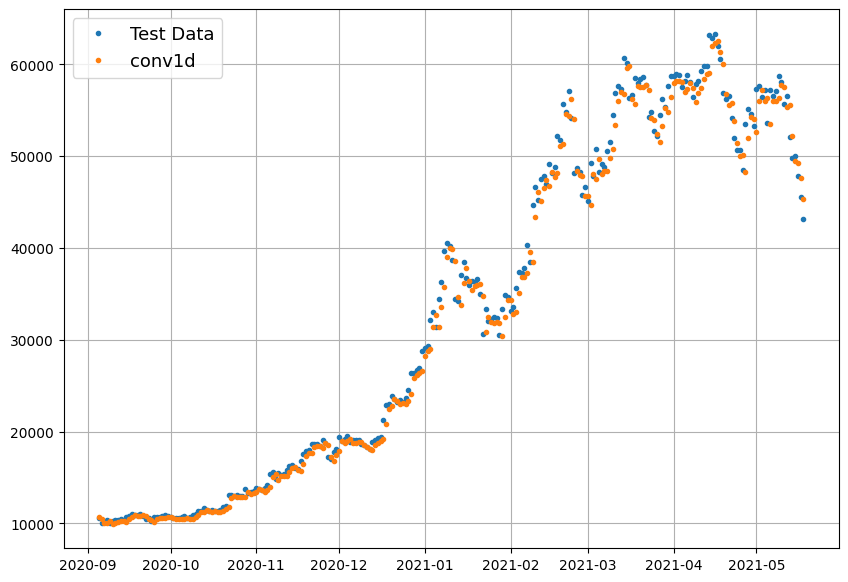

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_data):], values = test_labels[:, 0], start = OFFSET, legend_label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_data):], values = model_4_preds, start = OFFSET, legend_label = model_4.name)

In [ ]:
inputs = tf.keras.layers.Input(shape = (WINDOW))
x = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))(inputs)
x = tf.keras.layers.LSTM(128, return_sequences = True, activation = 'relu')(x)
x = tf.keras.layers.LSTM(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(HORIZON, activation = 'linear')(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'lstm')

In [ ]:
model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['accuracy'])

In [ ]:
model_5_history = model_5.fit(train_data,
                              train_labels,
                              epochs = 100,
                              validation_data = (test_data, test_labels),
                              verbose = 1,
                              batch_size = BATCH_SIZE,
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_5.name), create_model_checkpoint(model_5.name)])

Saving TensorBoard log files to: model_logs/lstm/20230630-083823
Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 2231.4585 - accuracy: 0.0000e+00
Epoch 1: val_loss improved from inf to 4045.86963, saving model to model_experiments/lstm
18/18 [==============================] - 10s 316ms/step - loss: 2189.4578 - accuracy: 0.0000e+00 - val_loss: 4045.8696 - val_accuracy: 0.0000e+00
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 393.7461 - accuracy: 0.0000e+00
Epoch 2: val_loss improved from 4045.86963 to 1054.79065, saving model to model_experiments/lstm
18/18 [==============================] - 4s 257ms/step - loss: 391.7830 - accuracy: 0.0000e+00 - val_loss: 1054.7906 - val_accuracy: 0.0000e+00
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 204.2592 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 1054.79065 to 1015.83881, saving model to model_experiments/lstm
18/18 [==============================] - 4s 215ms/step - 

In [ ]:
model_5_ = tf.keras.models.load_model('model_experiments/lstm')

In [ ]:
model_5.evaluate(test_data, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 592.6798 - accuracy: 0.0000e+00


[592.6798095703125, 0.0]

In [ ]:
model_5_preds = make_preds(model_5, test_data)

18/18 [==============================] - 0s 3ms/step


In [ ]:
model_5_results = calculate_forecast_results(y_true = tf.squeeze(test_labels),
                                             y_pred = model_5_preds)
model_5_results

{'mae': 592.6798,
 'mse': 1208726.0,
 'rmse': 1099.4208,
 'mape': 2.6598015,
 'mase': 1.0411743}

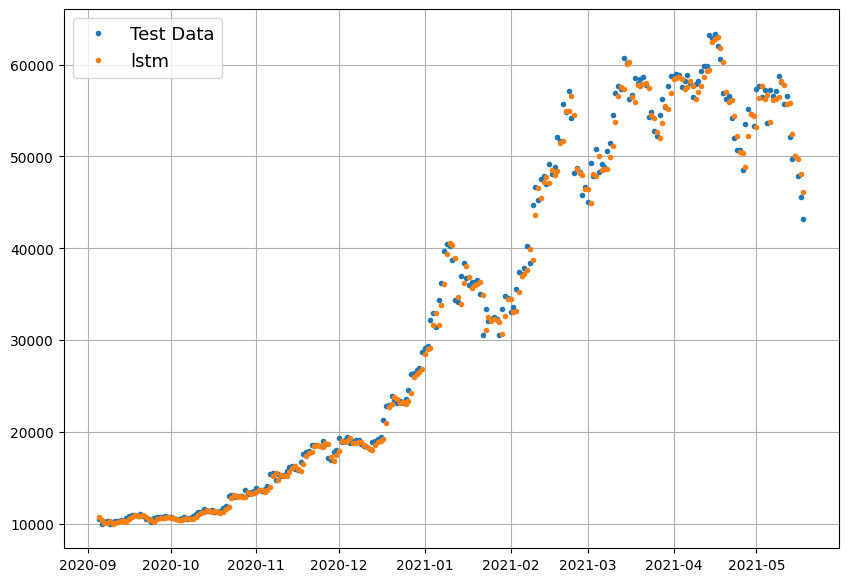

In [ ]:
plt.figure(figsize = (10, 7))
plot_time_series(timesteps = X_test[-len(test_data):], values = test_labels[:, 0], start = OFFSET, legend_label = 'Test Data')
plot_time_series(timesteps = X_test[-len(test_data):], values = model_5_preds, start = OFFSET, legend_label = model_5.name)

In [ ]:
block_reward_1 = 25
block_reward_1_datetime = np.datetime64('2012-11-28')
block_reward_2 = 25
block_reward_2_datetime = np.datetime64('2016-07-09')
block_reward_3 = 12.5
block_reward_3_datetime = np.datetime64('2020-05-18')

In [ ]:
block_reward_1_days = (block_reward_2_datetime - bitcoin_prices.index[0]).days
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days

In [ ]:
bitcoin_prices['Block Reward'] = None
bitcoin_prices.iloc[:block_reward_1_days, -1] = block_reward_1
bitcoin_prices.iloc[block_reward_1_days : block_reward_2_days, -1] = block_reward_2
bitcoin_prices.iloc[block_reward_2_days:, -1] = block_reward_3
bitcoin_prices

,Price,Block Reward
Date,,
2013-10-01,123.654990,25
2013-10-02,125.455000,25
2013-10-03,108.584830,25
2013-10-04,118.674660,25
2013-10-05,121.338660,25
...,...,...
2021-05-14,49764.132082,12.5
2021-05-15,50032.693137,12.5
2021-05-16,47885.625255,12.5


<Axes: >

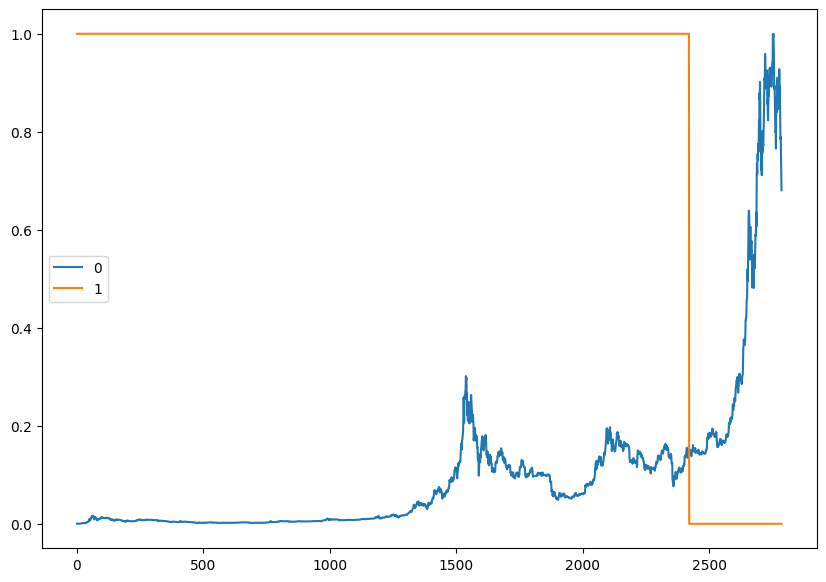

In [ ]:
bitcoin_prices_scaled = pd.DataFrame(minmax_scale(bitcoin_prices[['Price', 'Block Reward']]))
bitcoin_prices_scaled.plot(figsize = (10, 7))

In [ ]:
for i in range(WINDOW):
  bitcoin_prices[f'Price {i+1}'] = bitcoin_prices['Price'].shift(periods = i + 1)
bitcoin_prices

,Price,Block Reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,12.5,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,12.5,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,12.5,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices.dropna().drop('Price', axis = 1).astype(np.float32)
y = bitcoin_prices.dropna()['Price'].astype(np.float32)

In [ ]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
], name = 'multivariate')

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['accuracy'])

model_6_history = model_6.fit(x = X_train,
                              y = y_train,
                              epochs = 100,
                              verbose = 1,
                              batch_size = BATCH_SIZE,
                              validation_data = (X_test, y_test),
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_6.name), create_model_checkpoint(model_6.name)])

Saving TensorBoard log files to: model_logs/multivariate/20230630-084056
Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 526.2690 - accuracy: 0.0000e+00  
Epoch 1: val_loss improved from inf to 1384.29517, saving model to model_experiments/multivariate


18/18 [==============================] - 2s 47ms/step - loss: 518.2479 - accuracy: 0.0000e+00 - val_loss: 1384.2952 - val_accuracy: 0.0000e+00
Epoch 2/100
13/18 [====================>.........] - ETA: 0s - loss: 228.7361 - accuracy: 0.0000e+00
Epoch 2: val_loss did not improve from 1384.29517
18/18 [==============================] - 0s 6ms/step - loss: 218.7813 - accuracy: 0.0000e+00 - val_loss: 1484.4517 - val_accuracy: 0.0000e+00
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 194.8051 - accuracy: 0.0000e+00
Epoch 3: val_loss improved from 1384.29517 to 856.82330, saving model to model_experiments/multivariate


18/18 [==============================] - 1s 40ms/step - loss: 194.0701 - accuracy: 0.0000e+00 - val_loss: 856.8233 - val_accuracy: 0.0000e+00
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 144.3722 - accuracy: 0.0000e+00
Epoch 4: val_loss improved from 856.82330 to 844.93549, saving model to model_experiments/multivariate


18/18 [==============================] - 1s 38ms/step - loss: 146.3174 - accuracy: 0.0000e+00 - val_loss: 844.9355 - val_accuracy: 0.0000e+00
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 171.5594 - accuracy: 0.0000e+00
Epoch 5: val_loss did not improve from 844.93549
18/18 [==============================] - 0s 6ms/step - loss: 169.6083 - accuracy: 0.0000e+00 - val_loss: 1622.7305 - val_accuracy: 0.0000e+00
Epoch 6/100
14/18 [======================>.......] - ETA: 0s - loss: 179.9167 - accuracy: 0.0000e+00
Epoch 6: val_loss did not improve from 844.93549
18/18 [==============================] - 0s 7ms/step - loss: 178.1696 - accuracy: 0.0000e+00 - val_loss: 1667.5516 - val_accuracy: 0.0000e+00
Epoch 7/100
17/18 [===========================>..] - ETA: 0s - loss: 168.9391 - accuracy: 0.0000e+00
Epoch 7: val_loss improved from 844.93549 to 755.08246, saving model to model_experiments/multivariate


18/18 [==============================] - 1s 38ms/step - loss: 167.8788 - accuracy: 0.0000e+00 - val_loss: 755.0825 - val_accuracy: 0.0000e+00
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 125.8118 - accuracy: 0.0000e+00
Epoch 8: val_loss did not improve from 755.08246
18/18 [==============================] - 0s 6ms/step - loss: 124.5128 - accuracy: 0.0000e+00 - val_loss: 764.9046 - val_accuracy: 0.0000e+00
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 118.6805 - accuracy: 0.0000e+00
Epoch 9: val_loss improved from 755.08246 to 703.11444, saving model to model_experiments/multivariate


18/18 [==============================] - 1s 38ms/step - loss: 117.8997 - accuracy: 0.0000e+00 - val_loss: 703.1144 - val_accuracy: 0.0000e+00
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 145.7222 - accuracy: 0.0000e+00
Epoch 10: val_loss did not improve from 703.11444
18/18 [==============================] - 0s 6ms/step - loss: 144.5754 - accuracy: 0.0000e+00 - val_loss: 921.0789 - val_accuracy: 0.0000e+00
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 121.0526 - accuracy: 0.0000e+00
Epoch 11: val_loss did not improve from 703.11444
18/18 [==============================] - 0s 6ms/step - loss: 120.3808 - accuracy: 0.0000e+00 - val_loss: 951.7665 - val_accuracy: 0.0000e+00
Epoch 12/100
15/18 [========================>.....] - ETA: 0s - loss: 133.8181 - accuracy: 0.0000e+00
Epoch 12: val_loss did not improve from 703.11444
18/18 [==============================] - 0s 6ms/step - loss: 130.3387 - accuracy: 0.0000e+00 - val_loss: 809.9877 - val_

18/18 [==============================] - 1s 40ms/step - loss: 136.0784 - accuracy: 0.0000e+00 - val_loss: 603.5073 - val_accuracy: 0.0000e+00
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 146.5422 - accuracy: 0.0000e+00
Epoch 16: val_loss did not improve from 603.50726
18/18 [==============================] - 0s 7ms/step - loss: 144.7097 - accuracy: 0.0000e+00 - val_loss: 801.0413 - val_accuracy: 0.0000e+00
Epoch 17/100
17/18 [===========================>..] - ETA: 0s - loss: 133.1449 - accuracy: 0.0000e+00
Epoch 17: val_loss did not improve from 603.50726
18/18 [==============================] - 0s 6ms/step - loss: 132.4108 - accuracy: 0.0000e+00 - val_loss: 937.9046 - val_accuracy: 0.0000e+00
Epoch 18/100
17/18 [===========================>..] - ETA: 0s - loss: 129.2076 - accuracy: 0.0000e+00
Epoch 18: val_loss did not improve from 603.50726
18/18 [==============================] - 0s 6ms/step - loss: 130.4300 - accuracy: 0.0000e+00 - val_loss: 659.5705 - val_

18/18 [==============================] - 1s 38ms/step - loss: 133.9936 - accuracy: 0.0000e+00 - val_loss: 584.7589 - val_accuracy: 0.0000e+00
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 134.9841 - accuracy: 0.0000e+00
Epoch 21: val_loss did not improve from 584.75885
18/18 [==============================] - 0s 6ms/step - loss: 134.9296 - accuracy: 0.0000e+00 - val_loss: 587.0292 - val_accuracy: 0.0000e+00
Epoch 22/100
17/18 [===========================>..] - ETA: 0s - loss: 116.3862 - accuracy: 0.0000e+00
Epoch 22: val_loss improved from 584.75885 to 583.96100, saving model to model_experiments/multivariate


18/18 [==============================] - 1s 39ms/step - loss: 115.1289 - accuracy: 0.0000e+00 - val_loss: 583.9610 - val_accuracy: 0.0000e+00
Epoch 23/100
17/18 [===========================>..] - ETA: 0s - loss: 111.9611 - accuracy: 0.0000e+00
Epoch 23: val_loss did not improve from 583.96100
18/18 [==============================] - 0s 6ms/step - loss: 111.4317 - accuracy: 0.0000e+00 - val_loss: 619.6870 - val_accuracy: 0.0000e+00
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7082 - accuracy: 0.0000e+00
Epoch 24: val_loss did not improve from 583.96100
18/18 [==============================] - 0s 14ms/step - loss: 116.3809 - accuracy: 0.0000e+00 - val_loss: 797.0600 - val_accuracy: 0.0000e+00
Epoch 25/100
17/18 [===========================>..] - ETA: 0s - loss: 125.4932 - accuracy: 0.0000e+00
Epoch 25: val_loss did not improve from 583.96100
18/18 [==============================] - 0s 6ms/step - loss: 124.8640 - accuracy: 0.0000e+00 - val_loss: 795.9952 - val

18/18 [==============================] - 1s 57ms/step - loss: 112.6373 - accuracy: 0.0000e+00 - val_loss: 572.9896 - val_accuracy: 0.0000e+00
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 107.5015 - accuracy: 0.0000e+00
Epoch 38: val_loss did not improve from 572.98962
18/18 [==============================] - 0s 8ms/step - loss: 108.8367 - accuracy: 0.0000e+00 - val_loss: 574.8446 - val_accuracy: 0.0000e+00
Epoch 39/100
13/18 [====================>.........] - ETA: 0s - loss: 117.6229 - accuracy: 0.0000e+00
Epoch 39: val_loss did not improve from 572.98962
18/18 [==============================] - 0s 8ms/step - loss: 111.6993 - accuracy: 0.0000e+00 - val_loss: 878.8711 - val_accuracy: 0.0000e+00
Epoch 40/100
12/18 [===================>..........] - ETA: 0s - loss: 147.3763 - accuracy: 0.0000e+00
Epoch 40: val_loss did not improve from 572.98962
18/18 [==============================] - 0s 8ms/step - loss: 149.2306 - accuracy: 0.0000e+00 - val_loss: 1115.5840 - val

In [ ]:
model_6 = tf.keras.models.load_model('model_experiments/multivariate')

In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 572.9896 - accuracy: 0.0000e+00


[572.9896240234375, 0.0]

In [ ]:
model_6_preds = make_preds(model_6, X_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_6_results = calculate_forecast_results(y_true = y_test,
                                             y_pred = model_6_preds)
model_6_results

{'mae': 572.98956,
 'mse': 1178399.9,
 'rmse': 1085.5413,
 'mape': 2.571987,
 'mase': 1.0000672}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  """
  Creates a NBeats architecture block, inheriting from Keras Layer class
  """
  def __init__(self, input_size : int, theta_size : int, horizon : int, neurons : int, layers : int, **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.neurons = neurons
    self.layers = layers
    self.hidden = [tf.keras.layers.Dense(neurons, activation = 'relu', name = f'dense_layer_{i+1}') for i in range(layers)]
    self.outputs = tf.keras.layers.Dense(theta_size, activation = 'linear', name = 'output_layer')

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.outputs(x)
    backcast, forecast = theta[:, : self.input_size], theta[:, -self.horizon : ]
    return backcast, forecast

In [ ]:
HORIZON = 1
WINDOW = 7
BATCH_SIZE = 1024
EPOCHS = 5000
NEURONS = 512
LAYERS = 4
STACKS = 30
INPUT_SIZE = WINDOW * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [ ]:
bitcoin_prices

,Price,Block Reward,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,,
2013-10-01,123.654990,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,25,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,25,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,25,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,25,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,12.5,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,12.5,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,12.5,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
bitcoin_prices.drop('Block Reward', inplace = True, axis = 1)

In [ ]:
bitcoin_prices

,Price,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
Date,,,,,,,,
2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


In [ ]:
X = bitcoin_prices.dropna().drop('Price', axis = 1)
y = bitcoin_prices.dropna()['Price']
X_train, y_train = X[ : split_size], y[ : split_size]
X_test, y_test = X[split_size : ], y[split_size : ]

In [ ]:
 train_data = tf.data.Dataset.from_tensor_slices(X_train)
 train_labels = tf.data.Dataset.from_tensor_slices(y_test)
 test_data = tf.data.Dataset.from_tensor_slices(y_train)
 test_labels = tf.data.Dataset.from_tensor_slices(y_test)

In [ ]:
train_dataset = tf.data.Dataset.zip((train_data, train_labels))
test_dataset = tf.data.Dataset.zip((test_data, test_labels))

In [ ]:
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
%%time

nbeats_block = NBeatsBlock(input_size = INPUT_SIZE, theta_size = THETA_SIZE, neurons = NEURONS, layers = LAYERS, name = 'n_beats_block_1', horizon = HORIZON)
inputs = tf.keras.layers.Input(shape = (INPUT_SIZE), name = 'input')
backcast, forecast = nbeats_block(inputs)
residuals = tf.keras.layers.subtract([inputs, backcast], name=f"subtract_1")

for i, _ in enumerate(range(STACKS - 1)):
  nbeats_block = NBeatsBlock(input_size = INPUT_SIZE, theta_size = THETA_SIZE, neurons = NEURONS, layers = LAYERS, name = f'n_beats_block_{i + 2}', horizon = HORIZON)
  backcast, block_forecast = nbeats_block(residuals)
  residuals = tf.keras.layers.subtract([residuals, backcast], name = f'subtract_{i+2}')
  forecast = tf.keras.layers.add([forecast, block_forecast], name = f'add_{i+2}')

model_7 = tf.keras.Model(inputs = inputs, outputs = forecast, name = 'nbeats')

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['mae', 'mse'])

model_7_history = model_7.fit(train_dataset,
                              epochs = EPOCHS,
                              validation_data = test_dataset,
                              verbose = 1,
                              callbacks = [create_tensorboard_callback(dir_name = LOG_DIR, experiment_name = model_7.name), create_model_checkpoint(model_7.name), tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 200), tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 100, verbose = 1)])

Saving TensorBoard log files to: model_logs/nbeats/20230630-091656
Epoch 1/5000
1/1 [==============================] - ETA: 0s - loss: 19833.2891 - mae: 19833.2891 - mse: 705502976.0000

ValueError: ignored

In [ ]:
model_7.evaluate(test_dataset)

ValueError: ignored

In [ ]:
model_7_preds = make_preds(model_7, test_data)

In [ ]:
model_7_results = calculate_forecast_results(y_true = y_test,
                                             y_pred = model_7_preds)
model_7_results

In [ ]:
tf.keras.plot_model(model_7)

In [ ]:
def get_ensemble_models(horizon = HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        iterations = 10,
                        epochs = 1000,
                        loss_functions = ['mae', 'mse', 'mape']):
  """
  Returns a list of {iterations} models
  """
  ensemble_models = []
  for i in range(iterations):
    for function in loss_functions:
      print(f'Optimizing model by reducing: {function} for {epochs} epochs, model number: {i+1}')
      model = tf.keras.Sequential([
          tf.keras.layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          tf.keras.layers.Dense(128, kernel_initializer = 'he_normal', activation = 'relu'),
          tf.keras.layers.Dense(HORIZON, activation = 'linear')
      ], name = f'model_{i+1}')

      model.compile(loss = function,
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                    metrics = ['mae', 'mse'])
      model.fit(train_data,
                epochs = epochs,
                verbose = 0,
                validation_data = test_data,
                callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                              patience = 200,
                                                              restore_best_weights = True),
                             tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                                  patience = 100,
                                                                  verbose = 1)])
      ensemble_models.append(model)

    return ensemble_models

In [ ]:
ensemble_models = get_ensemble_models(iterations = 5,
                                      epochs = 1000)

In [ ]:
ensemble_models

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
%%time
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)
ensemble_preds

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis = 0)
ensemble_mean

In [ ]:
ensemble_median = np.median(ensemble_preds, axis = 0)
ensemble_median

In [ ]:
ensemble_results = calculate_forecast_results(y_test, ensemble_preds)
ensemble_results

In [ ]:
ensemble_results = calculate_forecast_results(y_test, ensemble_mean)
ensemble_results

In [ ]:
ensemble_results = calculate_forecast_results(y_test, ensemble_median)
ensemble_results

In [ ]:
def get_range(preds):
  std = tf.math.reduce_std(preds, axis = 0)
  interval = 1.96 * std
  preds_mean = tf.reduce_mean(preds, axis = 0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

In [ ]:
lower, upper = get_range(ensemble_preds)

In [ ]:
offset = 500
plt.figure(figsize = (10, 7))
plt.plot(X_test.index[offset: ], y_test[offset: ], 'g', label = 'Test Data')
plt.plot(X_test.index[offset: ], ensemble_median[offset: ], '-', label = 'Ensemble Median')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.fill_between(X_test.index[offset: ],
                 (lower)[offset:],
                 (upper)[offset:],
                 label = 'Prediction Interval')
plt.legend(loc = 'upper left', fontsize = 14)

In [ ]:
X = bitcoin_prices.dropna().drop('Price', axis = 1)
y = bitcoin_prices.dropna()['Price']

In [ ]:
 data = tf.data.Dataset.from_tensor_slices(X)
 labels = tf.data.Dataset.from_tensor_slices(y)
 dataset = tf.data.Dataset.zip((data, labels)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(HORIZON, activation = 'linear'),
], name = 'future')

model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.003),
                metrics = ['mae', 'mse'])
model_9_history = model_9.fit(dataset,
                              epochs = 100,
                              verbose = 1,
                              callbacks = [create_tensorboard_callback(LOG_DIR, model_9.name)])

In [ ]:
FUTURE = 14
def make_future_forecasts(values, model, future, window = WINDOW) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       future=INTO_FUTURE,
                                       window=WINDOW)

In [ ]:
def get_future_dates(start, future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start: date to start range (np.datetime64)
  future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start = start + np.timedelta64(offset, "D")
  end = start + np.timedelta64(future, "D")
  return np.arange(start, end, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

In [ ]:
next_time_steps = get_future_dates(start=last_timestep,
                                   future=FUTURE)
next_time_steps

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, bitcoin_prices[-1])
next_time_steps, future_forecast

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", legend_label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", legend_label="Predicted BTC Price")

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

In [ ]:

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 legend_label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam(learning_rate = 0.003))
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model.evaluate(X_test, y_test)

In [ ]:
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": model_9_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)